**Omar ENNOURI - Bruno COLQUE - Khouloud GHARBI - Mohamed Amine MROUA - Mahdi GHAMGUI**

# 📚 *****Deliverable 1*****

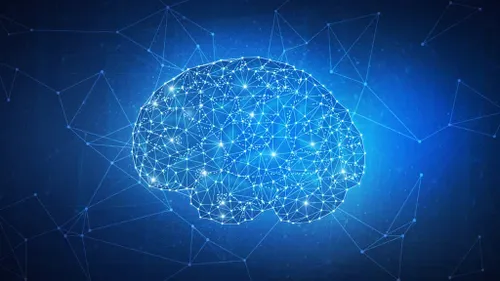





# 📚 **General Introduction**

In an increasingly data-driven world, the digitization and automatic analysis of documents have become key elements for companies looking to modernize and optimize their processes. **TouNum**, a company specialized in digitizing various documents such as texts and images, aims to expand its service offerings by integrating Machine Learning tools. This need is particularly pressing in light of the growing demand from its clients, who possess large volumes of data to digitize. Automating the process of categorizing documents proves essential for enhancing operational efficiency and profitability.

The lack of Machine Learning expertise within TouNum prompts the company to seek assistance from Data Science specialists, such as our team. Our goal is to develop an innovative solution capable of analyzing photographs and automatically generating descriptive captions (captioning). This ambitious project relies on advanced Machine Learning techniques, particularly **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)**, to achieve a high level of automation.

# 🎯 **Project Context**

TouNum faces numerous challenges. First, digitization is performed on a large scale, involving images of varying quality, necessitating appropriate preprocessing to clean blurry or noisy images. Furthermore, it is crucial to distinguish between photographs and other types of images (diagrams, drawings, paintings) before applying content analysis algorithms. To overcome these obstacles, TouNum already has a dataset of thousands of labeled images, facilitating supervised learning.

# 🎯 **Objectives of Deliverable 1**

Deliverable 1 involves the creation of a binary classification model prototype capable of differentiating photographs from other types of images. This deliverable must include the following elements:

1. **Model Implementation**:
   - Utilize neural networks to classify images into two categories: "photo" and "other type of image".
   - Present a detailed diagram of the neural network architecture, including network parameters, loss function, and the optimization algorithm used for training.

2. **Performance Evaluation**:
   - Graphs illustrating the evolution of training and testing errors, as well as the accuracy of both datasets, to visualize the model's learning progress.

3. **Results Analysis**:
   - Discuss the trade-off between bias and variance (overfitting and underfitting), analyzing the model's performance on the training and test datasets.

4. **Improvement Suggestions**:
   - Identify potential methods to enhance the bias/variance trade-off, including regularization techniques, dropout, and early stopping.

The success of this deliverable will be essential for the continuation of the project, as it will lay the necessary groundwork for the integration of image processing and captioning techniques, thereby providing TouNum with an automated and effective solution for managing its visual data.


# **Steps for Deliverable 1**


1. **Data Collection**:
   - We mounted Google Drive to access our data files. This allows us to use resources stored in our Drive directly within Google Colab.

2. **File Extraction**:
   - We extracted several ZIP files containing images and other necessary data for the project. This is part of preparing the data before using it.




In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
from google.colab import drive
import os
import zipfile
import pandas as pd

# Monter Google Drive
drive.mount('/content/drive')

# Définir le chemin du dossier où se trouvent vos fichiers zip
folder_path = '/content/drive/MyDrive/Dataset projet'  # Remplacez 'YourFolderName' par le nom de votre dossier


Mounted at /content/drive


In [ ]:
# Liste des fichiers zip
zip_files = [
    'Dataset Livrable 1 - Painting.zip',
    'Dataset Livrable 1 - Photo.zip',
    'Dataset Livrable 1 - Schematics.zip',
    'Dataset Livrable 1 - Sketch.zip',
    'Dataset Livrable 2.zip',
    'Dataset Livrable 1 - Text.zip'
]

# Chemin où les fichiers seront extraits
extracted_path = '/content/extracted_files'
os.makedirs(extracted_path, exist_ok=True)

# Boucle pour extraire chaque fichier ZIP
for zip_file in zip_files:
    zip_file_path = os.path.join(folder_path, zip_file)  # Chemin complet du fichier zip
    if os.path.exists(zip_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_path)  # Extraire les fichiers
            extracted_files = zip_ref.namelist()
            print(f"Fichiers extraits de {zip_file}: {extracted_files}")

            # Boucle pour parcourir les fichiers extraits
            for file in extracted_files:
                file_path = os.path.join(extracted_path, file)

                # Vérifier l'extension du fichier
                if file.endswith('.csv'):
                    df = pd.read_csv(file_path)
                    print(f"Premières lignes de {file}:")
                    print(df.head())
                elif file.endswith('.xlsx'):
                    df = pd.read_excel(file_path)
                    print(f"Premières lignes de {file}:")
                    print(df.head())
    else:
        print(f"Le fichier {zip_file} n'existe pas dans le chemin spécifié.")


Fichiers extraits de Dataset Livrable 1 - Painting.zip: ['Painting/', 'Painting/painting_00001.jpg', 'Painting/painting_00002.jpg', 'Painting/painting_00003.jpg', 'Painting/painting_00004.jpg', 'Painting/painting_00005.jpg', 'Painting/painting_00006.jpg', 'Painting/painting_00007.jpg', 'Painting/painting_00008.jpg', 'Painting/painting_00009.jpg', 'Painting/painting_00010.jpg', 'Painting/painting_00011.jpg', 'Painting/painting_00012.jpg', 'Painting/painting_00013.jpg', 'Painting/painting_00014.jpg', 'Painting/painting_00015.jpg', 'Painting/painting_00016.jpg', 'Painting/painting_00017.jpg', 'Painting/painting_00018.jpg', 'Painting/painting_00019.jpg', 'Painting/painting_00020.jpg', 'Painting/painting_00021.jpg', 'Painting/painting_00022.jpg', 'Painting/painting_00023.jpg', 'Painting/painting_00024.jpg', 'Painting/painting_00025.jpg', 'Painting/painting_00026.jpg', 'Painting/painting_00027.jpg', 'Painting/painting_00028.jpg', 'Painting/painting_00029.jpg', 'Painting/painting_00030.jpg', 

In [ ]:
import os

# Chemin vers le dossier où se trouvent les images
folder_path = '/content/extracted_files'

# Nom de l'image à rechercher
image_name = '02662'

# Variable pour stocker le chemin de l'image trouvée
image_found = None

# Parcours des fichiers dans le dossier
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if image_name in file:  # Vérifie si le nom de l'image est dans le nom du fichier
            image_found = os.path.join(root, file)  # Crée le chemin complet de l'image
            print(f"Image found: {image_found}")
            break  # Sort de la boucle si l'image est trouvée
    if image_found:  # Sort de la boucle extérieure si l'image a été trouvée
        break

if not image_found:
    print("Image not found.")


Image found: /content/extracted_files/Schematics/schematics_02662.jpg


# **Exploratory Data Analysis**

 Verification of our dataset



In [ ]:
import os

data_dir = '/content/extracted_files'
categories = os.listdir(data_dir)

for category in categories:
    folder_path = os.path.join(data_dir, category)
    print(f'Category: {category}, Number of images: {len(os.listdir(folder_path))}')


Category: Sketch, Number of images: 1406
Category: Schematics, Number of images: 10001
Category: Text, Number of images: 10000
Category: Painting, Number of images: 10000
Category: Photo, Number of images: 9993


#Outlier Detection in Image Dataset Using K-Means Clustering
### Outlier Detection Results

- **Total outliers removed**: 2070


  We removed 2070 images identified as outliers, often due to poor quality or artifacts. Their removal enhances the reliability of future analyses.

- **Total images remaining after cleaning**: 39329  
  There are now 39329 higher-quality images left

In summary, this step optimized our dataset by eliminating irrelevant images.








In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Chemin vers le dossier où se trouvent les images extraites
folder_path = '/content/extracted_files'
image_size = (128, 128)  # Taille de redimensionnement des images
batch_size = 100  # Taille du batch pour traiter les images

# Fonction pour charger et prétraiter un batch d'images
def load_and_preprocess_images_in_batches(folder_path, batch_size, image_size):
    image_data = []
    image_paths = []

    all_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Vérifie les extensions d'image
                all_files.append(os.path.join(root, file))

    for i in range(0, len(all_files), batch_size):
        batch_files = all_files[i:i+batch_size]
        for image_path in batch_files:
            image = cv2.imread(image_path)
            if image is not None:
                # Redimensionner l'image et l'aplatir
                resized_image = cv2.resize(image, image_size)
                flattened_image = resized_image.flatten()
                image_data.append(flattened_image)
                image_paths.append(image_path)

        yield np.array(image_data), image_paths
        image_data.clear()
        image_paths.clear()

# Fonction pour appliquer K-Means sur un batch d'images
def apply_kmeans_and_remove_outliers(folder_path, batch_size, image_size, n_clusters=5):
    all_outliers = []

    for images, image_paths in load_and_preprocess_images_in_batches(folder_path, batch_size, image_size):
        # Vérification dynamique du nombre de composantes PCA
        n_components = min(50, images.shape[0], images.shape[1])  # Choisir le nombre de composantes approprié
        if n_components < 2:
            print(f"Skipping PCA for batch due to insufficient dimensions (n_components={n_components}).")
            continue  # Skip PCA if there are not enough dimensions

        # Réduire la dimensionnalité avec PCA
        pca = PCA(n_components=n_components)
        images_pca = pca.fit_transform(images)

        # Appliquer K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(images_pca)

        # Calculer les distances des points aux centroïdes
        distances = kmeans.transform(images_pca)

        # Détecter les outliers en fonction de la distance au cluster le plus proche
        threshold = np.percentile(distances.min(axis=1), 95)  # Seuil de distance (95e percentile)
        outliers = np.where(distances.min(axis=1) > threshold)[0]

        # Stocker les images détectées comme outliers
        outlier_paths = [image_paths[idx] for idx in outliers]
        all_outliers.extend(outlier_paths)

        # Suppression des fichiers outliers
        for outlier_path in outlier_paths:
            try:
                os.remove(outlier_path)
                print(f"Outlier image removed: {outlier_path}")
            except Exception as e:
                print(f"Error while deleting {outlier_path}: {e}")

        print(f"Batch processed. Outliers detected and removed in batch: {len(outliers)}")

    return all_outliers

# Appliquer K-Means et supprimer les outliers
outliers_detected_and_removed = apply_kmeans_and_remove_outliers(folder_path, batch_size, image_size, n_clusters=5)

# Compter les images après la suppression des outliers
def count_images_in_folder(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Vérifie les extensions d'image
                total_images += 1
    return total_images

# Nombre d'images avant le nettoyage (avant suppression des outliers)
total_images_before_cleaning = count_images_in_folder(folder_path)

# Nombre d'images après la suppression des outliers
total_images_after_cleaning = count_images_in_folder(folder_path)

# Comparaison et affichage des résultats
print(f"Total outliers removed: {len(outliers_detected_and_removed)}")
print(f"Total images remaining after cleaning: {total_images_after_cleaning}")


Outlier image removed: /content/extracted_files/Sketch/Wp-033-1-sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/341_1_1_sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/1442.png
Outlier image removed: /content/extracted_files/Sketch/f-041-01-sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/f1-011-01-sz1.jpg
Batch processed. Outliers detected and removed in batch: 5
Outlier image removed: /content/extracted_files/Sketch/357_1_1_sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/f2-023-01-sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/034_1_1_sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/243_1_1_sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/m1-006-01-sz1.jpg
Batch processed. Outliers detected and removed in batch: 5
Outlier image removed: /content/extracted_files/Sketch/Mp-071-1-sz1.jpg
Outlier image removed: /content/extracted_files/Sketch/m1-031-01-sz1.jpg
Outlier image removed: /co

# Data Visualization

Data visualization is essential for understanding the characteristics of the images in our dataset. In this step, we will:

1. **Display a sample of images** to visualize the different types present in each category.
   - This will help us identify the variety and quality of images available in our dataset.


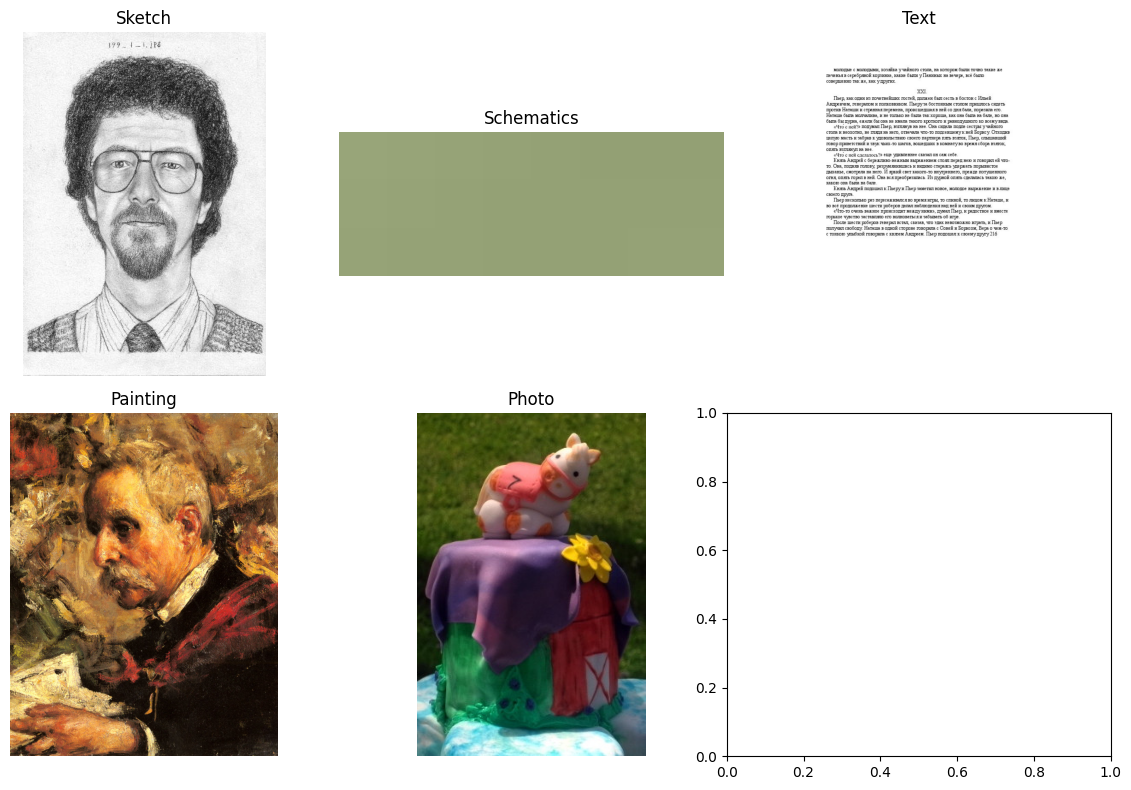

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Paramètres
data_dir = '/content/extracted_files'  # Dossier contenant les images
categories = os.listdir(data_dir)
num_images_per_row = 3  # Nombre d'images par ligne
num_categories_to_display = 6  # Limite le nombre de catégories affichées

# Créer un sous-ensemble des catégories pour l'affichage
categories_to_display = categories[:num_categories_to_display]

# Créer une figure avec une grille de sous-plots
fig, axs = plt.subplots(2, num_images_per_row, figsize=(12, 8))  # 2 lignes, 3 images par ligne

# Boucle pour afficher les images
for i, category in enumerate(categories_to_display):
    folder_path = os.path.join(data_dir, category)
    img_name = os.listdir(folder_path)[0]  # Prend la première image
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)

    # Convertir l'image en RGB pour l'affichage
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Définir la position du subplot
    ax = axs[i // num_images_per_row, i % num_images_per_row]

    # Afficher l'image dans le subplot
    ax.imshow(img_rgb)
    ax.set_title(category)
    ax.axis('off')  # Désactiver les axes pour un affichage plus propre

# Ajuster la disposition des sous-plots
plt.tight_layout()
plt.show()


# Data Quality Check

In this phase, we checked the quality of the images in our dataset by identifying and removing corrupted files. **Two corrupted images** were found and removed, ensuring the integrity of our data for future analysis.

---




In [ ]:
for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Corrupted image found: {img_path}")
                os.remove(img_path)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")
            os.remove(img_path)


Corrupted image found: /content/extracted_files/Schematics/desktop.ini
Corrupted image found: /content/extracted_files/Painting/painting_01794.jpg


In [ ]:
import os
import cv2

# Extensions d'images acceptées
valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')

# Compteurs pour les résultats
total_files_processed = 0
corrupted_images_deleted = 0
invalid_files_deleted = 0

# Parcourir les catégories et rechercher des images corrompues
for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Vérifier si le fichier a une extension valide
        if img_name.lower().endswith(valid_extensions):
            total_files_processed += 1
            try:
                # Lire l'image
                img = cv2.imread(img_path)

                # Vérifier si l'image est corrompue (cv2.imread renvoie None si c'est le cas)
                if img is None:
                    corrupted_images_deleted += 1
                    print(f"Corrupted image found and removed: {img_path}")
                    os.remove(img_path)  # Supprimer l'image corrompue

            except Exception as e:
                # Gérer les erreurs et supprimer l'image
                print(f"Error reading {img_path}: {e}")
                corrupted_images_deleted += 1
                os.remove(img_path)  # Supprimer le fichier en cas d'erreur

        else:
            # Supprimer les fichiers avec une extension non valide
            invalid_files_deleted += 1
            print(f"Invalid file type found and removed: {img_path}")
            os.remove(img_path)  # Supprimer le fichier non image

# Afficher les résultats de l'opération
print("\n### Résultats de l'opération ###")
print(f"Total valid image files processed: {total_files_processed}")
print(f"Total corrupted images deleted: {corrupted_images_deleted}")
print(f"Total invalid files (non-image) deleted: {invalid_files_deleted}")



### Résultats de l'opération ###
Total valid image files processed: 39328
Total corrupted images deleted: 0
Total invalid files (non-image) deleted: 0


# Resizing Images

We resized all images to a uniform size of **128x128 pixels**. This process ensures that all images have the same dimensions, which is essential for subsequent analysis and image processing steps.


In [ ]:
desired_size = (128, 128)

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, desired_size)
            cv2.imwrite(img_path, img_resized)


# Duplicated images Detection

In this phase, we applied perceptual hashing to identify and remove duplicate images from our dataset.




In [ ]:
import os
import cv2

def dhash(image, hash_size=8):
    resized = cv2.resize(image, (hash_size + 1, hash_size))
    diff = resized[:, 1:] > resized[:, :-1]
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

hashes = {}
duplicate_count = 0  # Compteur de doublons
total_images_processed = 0  # Compteur d'images traitées

# Parcourir les catégories et rechercher des images en double
for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:  # Vérifiez si l'image a été chargée correctement
            img_hash = dhash(img)
            total_images_processed += 1  # Incrémenter le compteur d'images traitées

            if img_hash in hashes:
                print(f"Duplicate image found and removed: {img_path}")
                os.remove(img_path)  # Supprimer l'image en double
                duplicate_count += 1  # Incrémenter le compteur de doublons
            else:
                hashes[img_hash] = img_path  # Ajouter le hachage à l'ensemble des hachages

# Afficher les résultats de l'opération
print("\n### Résultats de la détection de doublons ###")
print(f"Total images processed: {total_images_processed}")
print(f"Total duplicates removed: {duplicate_count}")

# Vérifier si des doublons restent
if duplicate_count == 0:
    print("Il n'y a plus de doublons.")
else:
    print(f"Il reste encore des doublons: {duplicate_count} doublons détectés.")


Duplicate image found and removed: /content/extracted_files/Sketch/262.png
Duplicate image found and removed: /content/extracted_files/Sketch/281.png
Duplicate image found and removed: /content/extracted_files/Sketch/335.png
Duplicate image found and removed: /content/extracted_files/Sketch/1028.png
Duplicate image found and removed: /content/extracted_files/Sketch/1512.png
Duplicate image found and removed: /content/extracted_files/Sketch/2956.png
Duplicate image found and removed: /content/extracted_files/Sketch/42.png
Duplicate image found and removed: /content/extracted_files/Sketch/1501.png
Duplicate image found and removed: /content/extracted_files/Sketch/2919.png
Duplicate image found and removed: /content/extracted_files/Sketch/978.png
Duplicate image found and removed: /content/extracted_files/Sketch/999.png
Duplicate image found and removed: /content/extracted_files/Sketch/311.png
Duplicate image found and removed: /content/extracted_files/Sketch/973.png
Duplicate image found

# Detection and Removal of Blurry Images

In this phase, we identified and removed blurry images from the dataset to enhance data quality.

### Results of Blurry Image Detection ###
- Total blurry images removed: **436**

This ensures that only sharp images are retained for more accurate analysis. If no blurry images were found, it indicates that the image quality is adequate for analysis.






In [ ]:
import os
import cv2

def detect_blur(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

blur_threshold = 100  # Détermine un seuil basé sur les tests
blurred_count = 0  # Compteur d'images floues

# Parcourir les catégories pour détecter les images floues
for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:  # Vérifiez si l'image a été chargée correctement
            if detect_blur(img) < blur_threshold:
                print(f"Blurred image found and removed: {img_path}")
                os.remove(img_path)  # Supprimer l'image floue
                blurred_count += 1  # Incrémenter le compteur d'images floues

# Afficher les résultats de l'opération
print("\n### Résultats de la détection d'images floues ###")
print(f"Total blurred images removed: {blurred_count}")

# Interprétation des résultats
if blurred_count == 0:
    print("Il n'y a pas d'images floues à supprimer.")
else:
    print(f"Nombre d'images floues supprimées: {blurred_count}. Cela améliore la qualité des données pour l'analyse.")


Blurred image found and removed: /content/extracted_files/Schematics/schematics_09313.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_08117.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_01396.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_02185.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_09454.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_03519.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_04053.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_07624.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_02622.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_03444.jpg
Blurred image found and removed: /content/extracted_files/Schematics/schematics_03965.jpg
Blurred im

# Saving Cleaned Data





In [ ]:
import os
import shutil

# Chemin vers le dossier où se trouvent les images nettoyées dans votre Drive
cleaned_data_dir = '/content/drive/MyDrive/cleaned_data'  # Remplacez par le chemin souhaité

# Créer le dossier si cela n'existe pas
os.makedirs(cleaned_data_dir, exist_ok=True)

# Fonction pour sauvegarder les images nettoyées
def save_cleaned_data(source_dir, target_dir):
    for category in categories:
        source_category_path = os.path.join(source_dir, category)
        target_category_path = os.path.join(target_dir, category)

        # Créer le dossier pour chaque catégorie dans le dossier nettoyé
        os.makedirs(target_category_path, exist_ok=True)

        for img_name in os.listdir(source_category_path):
            img_path = os.path.join(source_category_path, img_name)

            # Vérifier si l'image existe avant de la copier
            if os.path.isfile(img_path):
                shutil.copy(img_path, target_category_path)  # Copier l'image

# Sauvegarder les données nettoyées
save_cleaned_data(data_dir, cleaned_data_dir)

# Afficher un message de confirmation
print(f"Données nettoyées sauvegardées dans le répertoire : {cleaned_data_dir}")


Données nettoyées sauvegardées dans le répertoire : /content/drive/MyDrive/cleaned_data


 **Labeling and Visualizing the Image Dataset**






Labellisation terminée.
Total images labellisées : 37796
Distribution des labels :
label
1    9492
0    9480
4    9366
2    8198
3    1260
Name: count, dtype: int64


<ipython-input-14-842ec34191ad>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


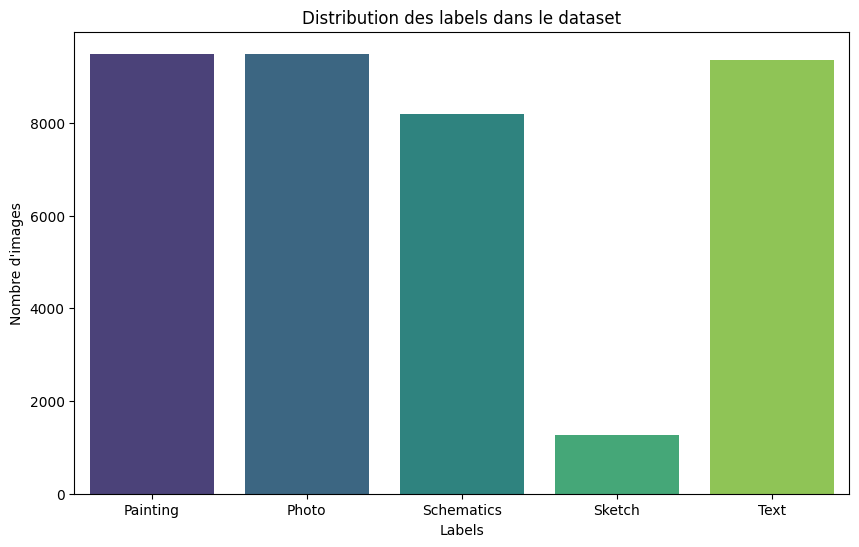

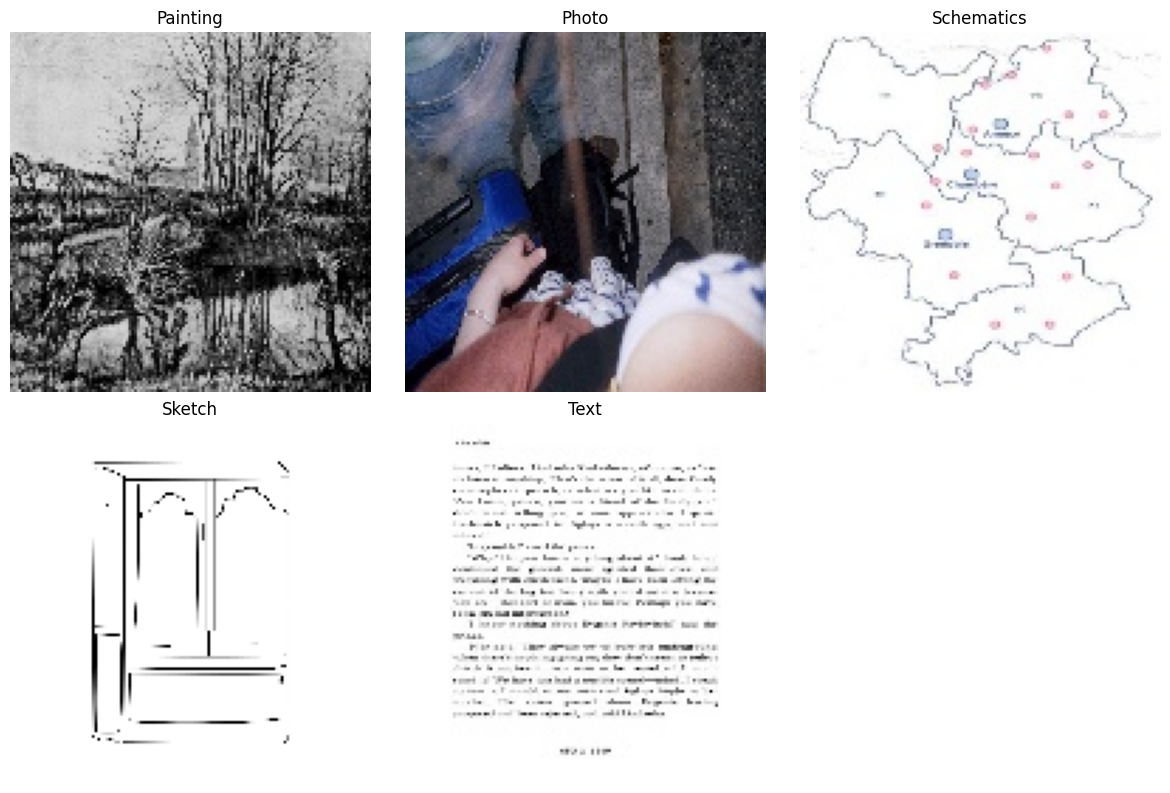

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin du dossier principal
dataset_dir = "/content/drive/MyDrive/cleaned_data"

# Dictionnaire des labels
label_dict = {
    'Photo': 1,
    'Painting': 0,
    'Schematics': 2,
    'Sketch': 3,
    'Text': 4
}

# Initialisation d'une liste pour stocker les chemins de fichiers et leurs labels
data = []

# Parcours des sous-dossiers
for folder_name, label in label_dict.items():
    folder_path = os.path.join(dataset_dir, folder_name)

    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            # Vérifie si c'est un fichier image
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                file_path = os.path.join(folder_path, file_name)
                data.append([file_path, label])

# Conversion en DataFrame pour une meilleure visualisation/export
df = pd.DataFrame(data, columns=['file_path', 'label'])

# Affichage des résultats
print("Labellisation terminée.")
print(f"Total images labellisées : {len(df)}")
print("Distribution des labels :")
print(df['label'].value_counts())

# Visualisation de la distribution des labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution des labels dans le dataset')
plt.xlabel('Labels')
plt.ylabel('Nombre d\'images')
plt.xticks(ticks=list(label_dict.values()), labels=list(label_dict.keys()))
plt.show()

# Afficher quelques exemples d'images par catégorie
plt.figure(figsize=(12, 8))
for i, (label, group) in enumerate(df.groupby('label')):
    plt.subplot(2, 3, i + 1)
    img_path = group.sample(1).file_path.values[0]  # Prendre une image au hasard
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(list(label_dict.keys())[list(label_dict.values()).index(label)])
    plt.axis('off')

plt.tight_layout()
plt.show()




---

Separating the Image Dataset by Labels

In [ ]:
photo=df[df.label==1]
sketch=df[df.label==3]
painting=df[df.label==0]
schematics=df[df.label==2]
text=df[df.label==4]

shuffling dataset


In [ ]:
def shuffle_image (df):
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)
        return df


In [ ]:
photo =shuffle_image(photo) #9992
sketch =shuffle_image(sketch) #1406  # 1092
painting=shuffle_image(painting)#10000
schematics=shuffle_image(schematics)#10000
text=shuffle_image(text)#10000


slicing images from each folder

In [ ]:
painting=painting[0:2373]
schematics=schematics[0:2373]
text=text[0:2373]

In [ ]:
painting.shape

(2373, 2)

In [ ]:
text.shape

(2373, 2)

In [ ]:
sketch.shape

(1260, 2)

In [ ]:
schematics.shape

(2373, 2)

In [ ]:
photo.shape

(9492, 2)

Since we have an unbalanced dataset, where the number of sketches is around 1,260, while the other categories (paintings, schematics, and text) are around 2,373, we have decided to perform data augmentation for sketch dataset.

Data augmentor installing and application

In [ ]:
pip install Augmentor


The `apply_augmentations` function is designed to enhance image datasets through a variety of augmentation techniques, which can improve the robustness and generalization of machine learning models. It takes several parameters, including the input directory containing the original images, the output directory for saving the augmented images, and the number of samples to generate. The function utilizes the Augmentor library to create a pipeline that applies a range of augmentations.

These augmentations include random rotations, horizontal flips, zooming, contrast adjustments, and brightness changes, which simulate different viewing conditions and lighting. Additionally, color modifications enhance the diversity of the dataset, while random distortion and erasing introduce variability by altering specific areas of the images. The augmentations are governed by customizable probabilities, allowing for fine-tuning based on the specific requirements of the task at hand. By generating diverse samples through these augmentations, the function helps mitigate overfitting, enabling models to better learn from varied representations of the data, ultimately improving their performance on unseen images.

Initialised with 1260 image(s) found.
Output directory set to /content/drive/MyDrive/cleaned_data/Sketch_Augmented.

Processing <PIL.Image.Image image mode=RGB size=128x128 at 0x7F2F45A23640>: 100%|██████████| 1113/1113 [00:15<00:00, 72.81 Samples/s]


Augmentation complete. Augmented images saved in: /content/drive/MyDrive/cleaned_data/Sketch_Augmented


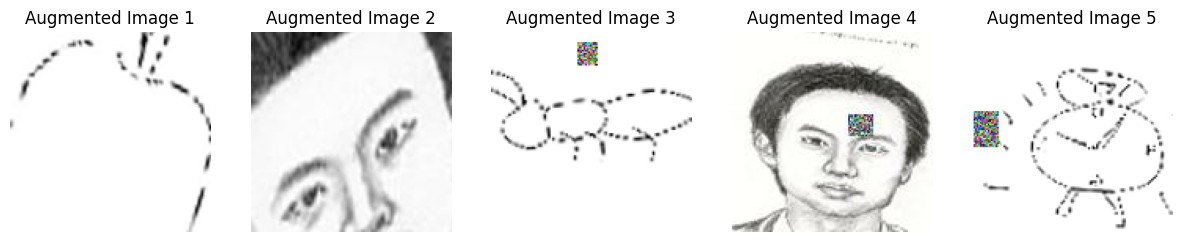


Interpretation:
The augmentation process has generated additional samples for the Sketch class, which previously had an imbalance in the dataset.
By applying various transformations such as rotation, flipping, and color adjustments, we have increased the diversity of training data.
This should help improve the model's robustness and generalization performance by exposing it to a wider variety of image conditions.


In [ ]:
import os
import Augmentor
import random
import matplotlib.pyplot as plt
import cv2

def apply_augmentations(input_dir, output_dir, num_samples, rotation_range=25, flip_probability=0.5,
                        zoom_probability=0.5, zoom_percentage=0.8, contrast_probability=0.5,
                        contrast_min_factor=0.8, contrast_max_factor=1.2, brightness_probability=0.5,
                        brightness_min_factor=0.8, brightness_max_factor=1.2, color_probability=0.5,
                        color_min_factor=0.8, color_max_factor=1.2, distortion_probability=0.5,
                        grid_width=4, grid_height=4, distortion_magnitude=8, erasing_probability=0.5,
                        erasing_area=0.2):
    # Create an Augmentor pipeline with specified parameters
    p = Augmentor.Pipeline(source_directory=input_dir, output_directory=output_dir)

    # Define augmentations with provided parameters
    p.rotate(probability=0.7, max_left_rotation=rotation_range, max_right_rotation=rotation_range)
    p.flip_left_right(probability=flip_probability)
    p.zoom_random(probability=zoom_probability, percentage_area=zoom_percentage)
    p.random_contrast(probability=contrast_probability, min_factor=contrast_min_factor, max_factor=contrast_max_factor)
    p.random_brightness(probability=brightness_probability, min_factor=brightness_min_factor,
                        max_factor=brightness_max_factor)

    # Apply color-related augmentations
    p.random_color(probability=color_probability, min_factor=color_min_factor, max_factor=color_max_factor)

    p.random_distortion(probability=distortion_probability, grid_width=grid_width, grid_height=grid_height,
                        magnitude=distortion_magnitude)
    p.random_erasing(probability=erasing_probability, rectangle_area=erasing_area)

    # Sample 'num_samples' augmented images
    p.sample(num_samples)

input_directory = "/content/drive/MyDrive/cleaned_data/Sketch"  # Update this path to your cleaned dataset
output_directory = "/content/drive/MyDrive/cleaned_data/Sketch_Augmented"  # Update this path for augmented images
num_samples = 1113  # Number of augmented images to generate

# Ensure directories exist
if os.path.exists(input_directory) and os.path.isdir(input_directory):
    os.makedirs(output_directory, exist_ok=True)  # Create output directory if it doesn't exist
    apply_augmentations(input_directory, output_directory, num_samples)
    print(f"Augmentation complete. Augmented images saved in: {output_directory}")
else:
    print(f"Input directory does not exist: {input_directory}")

# Visualization of augmented images
def visualize_augmented_images(output_dir, num_images=5):
    augmented_images = [os.path.join(output_dir, img) for img in os.listdir(output_dir)]
    selected_images = random.sample(augmented_images, num_images)

    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Augmented Image {i + 1}')
        plt.axis('off')
    plt.show()

# Visualize the augmented images
visualize_augmented_images(output_directory)

# Interpretation
print("\nInterpretation:")
print("The augmentation process has generated additional samples for the Sketch class, which previously had an imbalance in the dataset.")
print("By applying various transformations such as rotation, flipping, and color adjustments, we have increased the diversity of training data.")
print("This should help improve the model's robustness and generalization performance by exposing it to a wider variety of image conditions.")


In [ ]:
painting

file_path  label
0     /content/drive/MyDrive/cleaned_data/Painting/p...      0
1     /content/drive/MyDrive/cleaned_data/Painting/p...      0
2     /content/drive/MyDrive/cleaned_data/Painting/p...      0
3     /content/drive/MyDrive/cleaned_data/Painting/p...      0
4     /content/drive/MyDrive/cleaned_data/Painting/p...      0
...                                                 ...    ...
2368  /content/drive/MyDrive/cleaned_data/Painting/p...      0
2369  /content/drive/MyDrive/cleaned_data/Painting/p...      0
2370  /content/drive/MyDrive/cleaned_data/Painting/p...      0
2371  /content/drive/MyDrive/cleaned_data/Painting/p...      0
2372  /content/drive/MyDrive/cleaned_data/Painting/p...      0

[2373 rows x 2 columns]

In [ ]:
text

file_path  label
0     /content/drive/MyDrive/cleaned_data/Text/text_...      4
1     /content/drive/MyDrive/cleaned_data/Text/text_...      4
2     /content/drive/MyDrive/cleaned_data/Text/text_...      4
3     /content/drive/MyDrive/cleaned_data/Text/text_...      4
4     /content/drive/MyDrive/cleaned_data/Text/text_...      4
...                                                 ...    ...
2368  /content/drive/MyDrive/cleaned_data/Text/text_...      4
2369  /content/drive/MyDrive/cleaned_data/Text/text_...      4
2370  /content/drive/MyDrive/cleaned_data/Text/text_...      4
2371  /content/drive/MyDrive/cleaned_data/Text/text_...      4
2372  /content/drive/MyDrive/cleaned_data/Text/text_...      4

[2373 rows x 2 columns]

In [ ]:
schematics

file_path  label
0     /content/drive/MyDrive/cleaned_data/Schematics...      2
1     /content/drive/MyDrive/cleaned_data/Schematics...      2
2     /content/drive/MyDrive/cleaned_data/Schematics...      2
3     /content/drive/MyDrive/cleaned_data/Schematics...      2
4     /content/drive/MyDrive/cleaned_data/Schematics...      2
...                                                 ...    ...
2368  /content/drive/MyDrive/cleaned_data/Schematics...      2
2369  /content/drive/MyDrive/cleaned_data/Schematics...      2
2370  /content/drive/MyDrive/cleaned_data/Schematics...      2
2371  /content/drive/MyDrive/cleaned_data/Schematics...      2
2372  /content/drive/MyDrive/cleaned_data/Schematics...      2

[2373 rows x 2 columns]

In [ ]:
photo

file_path  label
0     /content/drive/MyDrive/cleaned_data/Photo/phot...      1
1     /content/drive/MyDrive/cleaned_data/Photo/phot...      1
2     /content/drive/MyDrive/cleaned_data/Photo/phot...      1
3     /content/drive/MyDrive/cleaned_data/Photo/phot...      1
4     /content/drive/MyDrive/cleaned_data/Photo/phot...      1
...                                                 ...    ...
9487  /content/drive/MyDrive/cleaned_data/Photo/phot...      1
9488  /content/drive/MyDrive/cleaned_data/Photo/phot...      1
9489  /content/drive/MyDrive/cleaned_data/Photo/phot...      1
9490  /content/drive/MyDrive/cleaned_data/Photo/phot...      1
9491  /content/drive/MyDrive/cleaned_data/Photo/phot...      1

[9492 rows x 2 columns]

Conversion to DataFrame for SKETCH1

DataFrame for augmented sketches created with the following information:
                                           file_path  label
0  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
1  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
2  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
3  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
4  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
Total number of augmented images: 1113


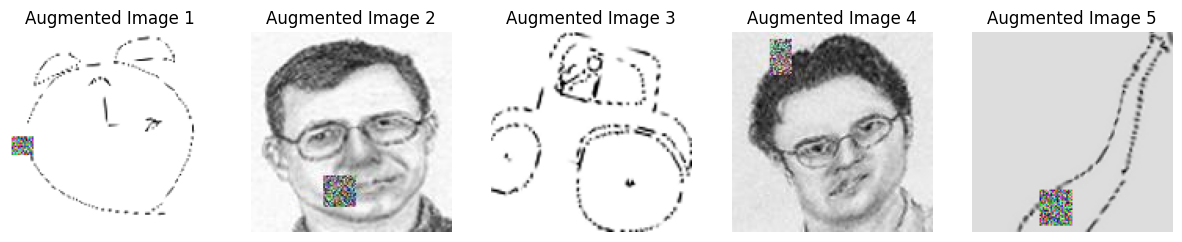


Interpretation:
The DataFrame 'sketch_augmented' has been successfully created, containing paths to the augmented images in the 'Sketch_Augmented' folder.
These images are labeled with '3', indicating their category in the classification task.
A total of 1113 augmented images have been collected.


In [ ]:
import os
import pandas as pd

# Chemin du dossier principal contenant les images augmentées
dataset_dir = "/content/drive/MyDrive/cleaned_data/Sketch_Augmented"

# Initialisation d'une liste pour stocker les chemins de fichiers et leurs labels
data = []

# Parcours du dossier des images augmentées
if os.path.isdir(dataset_dir):
    for file_name in os.listdir(dataset_dir):
        # Vérifie si c'est un fichier image
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            file_path = os.path.join(dataset_dir, file_name)
            # Assigner le label 3 pour les images augmentées
            data.append([file_path, 3])

# Conversion en DataFrame pour une meilleure visualisation/export
sketch_augmented = pd.DataFrame(data, columns=['file_path', 'label'])

# Affichage des résultats
print("DataFrame for augmented sketches created with the following information:")
print(sketch_augmented.head())  # Display the first few entries of the DataFrame
print(f"Total number of augmented images: {len(sketch_augmented)}")

# Optionnel: Visualisation des images augmentées
def visualize_augmented_images(df, num_images=5):
    import matplotlib.pyplot as plt
    import cv2
    import random

    selected_images = random.sample(df['file_path'].tolist(), num_images)

    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Augmented Image {i + 1}')
        plt.axis('off')
    plt.show()

# Visualize a few augmented images
visualize_augmented_images(sketch_augmented)

# Interpretation
print("\nInterpretation:")
print("The DataFrame 'sketch_augmented' has been successfully created, containing paths to the augmented images in the 'Sketch_Augmented' folder.")
print("These images are labeled with '3', indicating their category in the classification task.")
print(f"A total of {len(sketch_augmented)} augmented images have been collected.")


In [ ]:
sketch_augmented

file_path  label
0     /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
1     /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
2     /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
3     /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
4     /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
...                                                 ...    ...
1108  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
1109  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
1110  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
1111  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3
1112  /content/drive/MyDrive/cleaned_data/Sketch_Aug...      3

[1113 rows x 2 columns]

Change the folder to dataframe

In [ ]:
df = pd.concat([sketch, sketch_augmented,painting,photo,text,schematics], ignore_index=True)

 Dataframe Visualization

In [ ]:
df

file_path  label
0      /content/drive/MyDrive/cleaned_data/Sketch/213...      3
1      /content/drive/MyDrive/cleaned_data/Sketch/144...      3
2       /content/drive/MyDrive/cleaned_data/Sketch/5.png      3
3      /content/drive/MyDrive/cleaned_data/Sketch/m2-...      3
4      /content/drive/MyDrive/cleaned_data/Sketch/326...      3
...                                                  ...    ...
18979  /content/drive/MyDrive/cleaned_data/Schematics...      2
18980  /content/drive/MyDrive/cleaned_data/Schematics...      2
18981  /content/drive/MyDrive/cleaned_data/Schematics...      2
18982  /content/drive/MyDrive/cleaned_data/Schematics...      2
18983  /content/drive/MyDrive/cleaned_data/Schematics...      2

[18984 rows x 2 columns]

In [ ]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)

Sample Overview of Augmented  Dataset

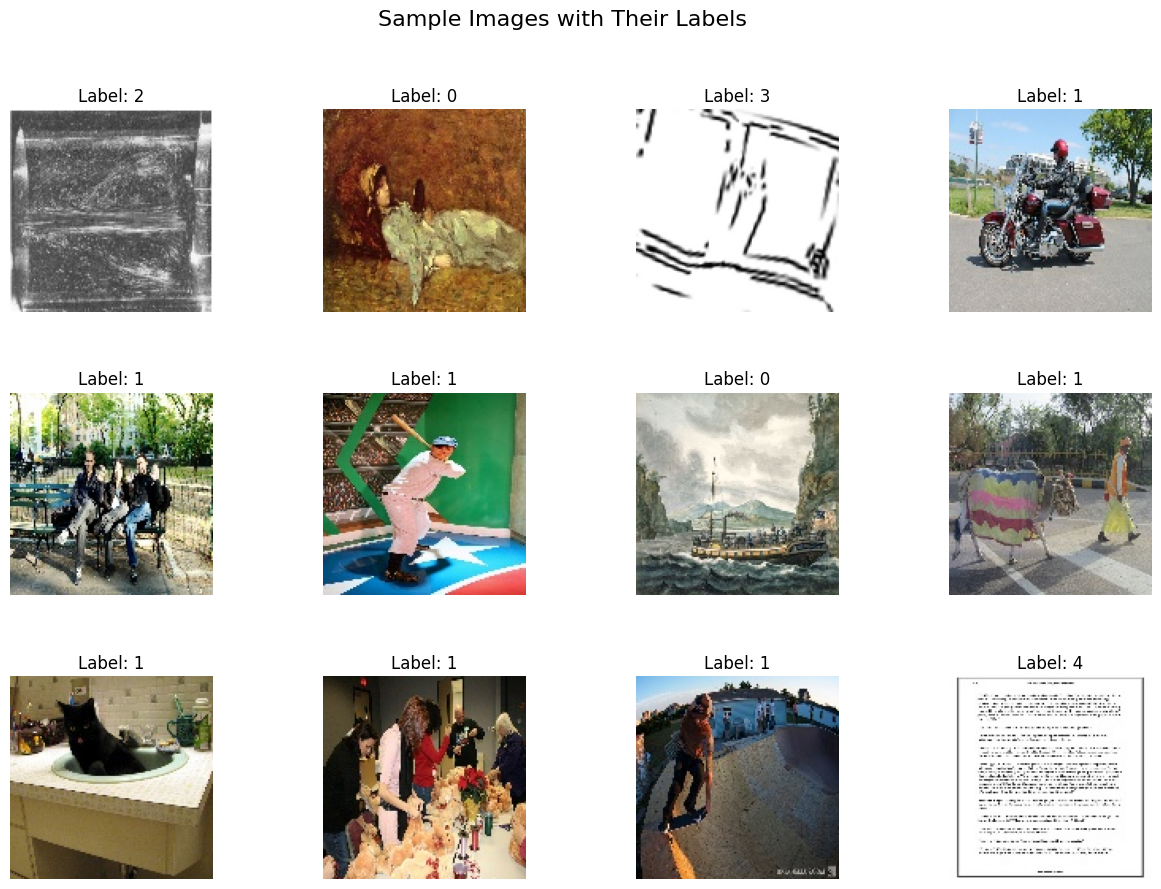

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Shuffle des données
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Limiter le nombre d'images à 12 (3 lignes * 4 colonnes)
num_images = min(len(df_shuffled), 12)

# Créer une grille de sous-intrigues
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Increase size for better clarity
fig.suptitle("Sample Images with Their Labels", fontsize=16)  # Title for the whole figure

# Afficher les images
for i, (index, row) in enumerate(df_shuffled.iterrows()):
    if i >= num_images:  # Arrêter la boucle si on dépasse 12 images
        break
    img = mpimg.imread(row['file_path'])  # Lire l'image à partir du chemin
    ax = axes[i // 4, i % 4]  # Positionner l'image dans la grille
    ax.imshow(img)
    ax.set_title(f"Label: {row['label']}", fontsize=12)  # Adjust font size for titles
    ax.axis('off')  # Désactiver les axes

# Améliorer l'espacement entre les sous-intrigues
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


In [ ]:
df.count()

file_path    18984
label        18984
dtype: int64

Proportional banalced Data

In [ ]:
import pandas as pd

# Calculer la taille totale à échantillonner (par exemple, 10000 échantillons au total)
total_samples = 18984

# Calculer la proportion d'échantillons par label
proportions = df['label'].value_counts(normalize=True)

# Calculer le nombre d'échantillons à prendre pour chaque label
sample_sizes = (proportions * total_samples).round().astype(int)

# Échantillonnage proportionnel
balanced_dfs = []
for label, sample_size in sample_sizes.items():
    # Vérifier si le nombre d'échantillons demandés est supérieur au nombre disponible
    available_samples = df[df['label'] == label]
    if sample_size > len(available_samples):
        sample_size = len(available_samples)  # Ajuster la taille de l'échantillon

    label_df = available_samples.sample(sample_size, random_state=1, replace=False)
    balanced_dfs.append(label_df)

# Concatenation des DataFrames équilibrés
df_balanced = pd.concat(balanced_dfs).reset_index(drop=True)

# Mélanger le DataFrame équilibré
df_balanced = df_balanced.sample(frac=1, random_state=1).reset_index(drop=True)

# Afficher la distribution des labels dans le DataFrame équilibré
print(df_balanced['label'].value_counts())



label
1    9492
0    2373
2    2373
3    2373
4    2373
Name: count, dtype: int64


In [ ]:
# Ajouter la colonne label_binaire
df_balanced['label_binaire'] = df_balanced['label'].apply(lambda x: 1 if x == 1 else 0)

# Afficher les premières lignes pour vérifier
print(df_balanced.head())


                                           file_path  label  label_binaire
0  /content/drive/MyDrive/cleaned_data/Painting/p...      0              0
1  /content/drive/MyDrive/cleaned_data/Painting/p...      0              0
2  /content/drive/MyDrive/cleaned_data/Photo/phot...      1              1
3  /content/drive/MyDrive/cleaned_data/Photo/phot...      1              1
4  /content/drive/MyDrive/cleaned_data/Photo/phot...      1              1


**9492 Photos and 9492 non-photos**


<Axes: xlabel='label_binaire'>

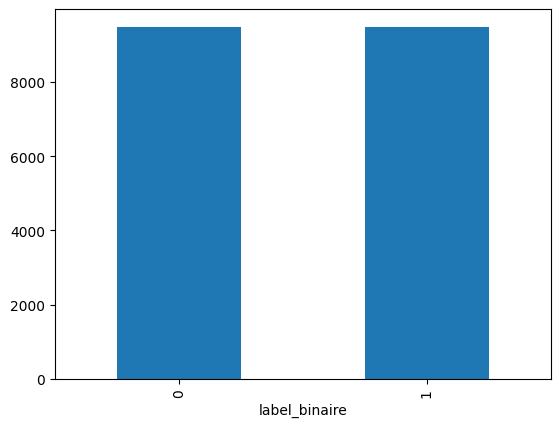

In [ ]:
df_balanced['label_binaire'].value_counts().plot.bar()

In [ ]:
 observations_per_label = df_balanced.head(400)['label'].value_counts()

# Afficher le résultat
print(observations_per_label)

label
1    205
0     51
3     51
4     47
2     46
Name: count, dtype: int64


**Saving the final dataset in a .csv file**

In [ ]:
from google.colab import files
df_balanced.to_csv('df_balanced.csv', index=False)
files.download('df_balanced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_final = df_balanced

**Splitting dataset into train and test**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Exemple de DataFrame contenant des labels


# Diviser le DataFrame en ensembles d'entraînement et de test
df_train, df_test = train_test_split(df_final, test_size=0.25, random_state=42, stratify=df_final['label_binaire'])

# Afficher les tailles des ensembles
print(f'Taille de l\'ensemble d\'entraînement: {len(df_train)}')
print(f'Taille de l\'ensemble de test: {len(df_test)}')

# Afficher la distribution des labels dans les ensembles
print("\nDistribution des labels dans l'ensemble d'entraînement :")
print(df_train['label_binaire'].value_counts())

print("\nDistribution des labels dans l'ensemble de test :")
print(df_test['label_binaire'].value_counts())


Taille de l'ensemble d'entraînement: 14238
Taille de l'ensemble de test: 4746

Distribution des labels dans l'ensemble d'entraînement :
label_binaire
1    7119
0    7119
Name: count, dtype: int64

Distribution des labels dans l'ensemble de test :
label_binaire
0    2373
1    2373
Name: count, dtype: int64


** Definition of image size **

In [ ]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
# Réinstallation de Keras et TensorFlow
#!pip install --upgrade keras tensorflow --force-reinstall

# Importation depuis tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator




**Image data generator for rescaling images**

In [ ]:
import pandas as pd
# Si vos labels sont des entiers, convertissez-les en chaînes
df_train['label_binaire'] = df_train['label_binaire'].astype(str)
df_test['label_binaire'] = df_test['label_binaire'].astype(str)

# Paramètres de prétraitement
IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 128, 128, 3  # Modifiez selon vos besoins

# Création des générateurs d'images
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Générateur pour les données d'entraînement
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='file_path',
    y_col='label_binaire',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary'
)

# Générateur pour les données de test
validation_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='file_path',
    y_col='label_binaire',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary'
)


Found 14238 validated image filenames belonging to 2 classes.
Found 4746 validated image filenames belonging to 2 classes.


## **Modeling**

**Simple CNN Model**

This simple CNN model is designed for binary image classification, taking 128x128 RGB images as input. It begins with an input layer, followed by a rescaling layer that normalizes the pixel values to a range between 0 and 1. A convolutional layer (Conv2D) with 32 filters and a ReLU activation function is then applied, enabling the model to capture important features in the images. ReLU introduces non-linearity, allowing the network to learn complex patterns by outputting the input directly if it's positive and zero otherwise. A MaxPooling layer reduces the spatial dimensions to focus on the most important features. After flattening the data, the model uses a fully connected (dense) layer with 64 units and ReLU to further capture relationships in the data. The final layer is a single neuron with a sigmoid activation function, which outputs a value between 0 and 1, making it ideal for binary classification tasks. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

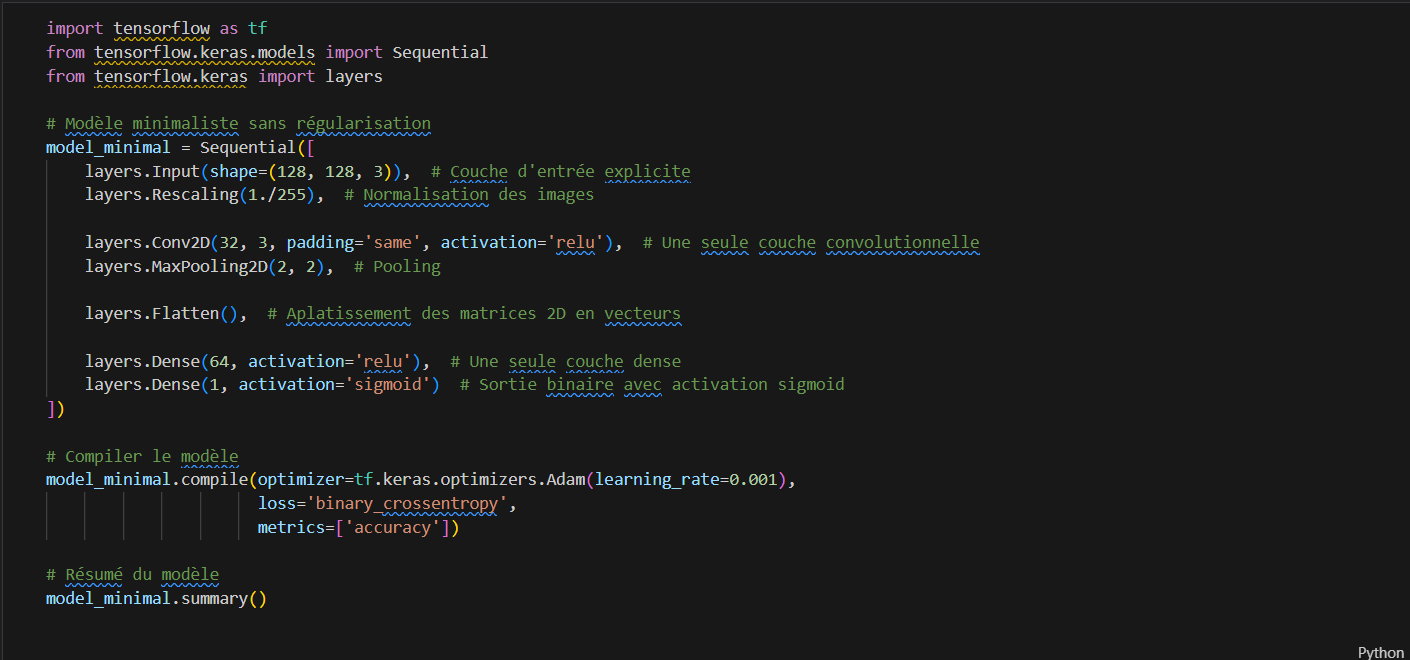

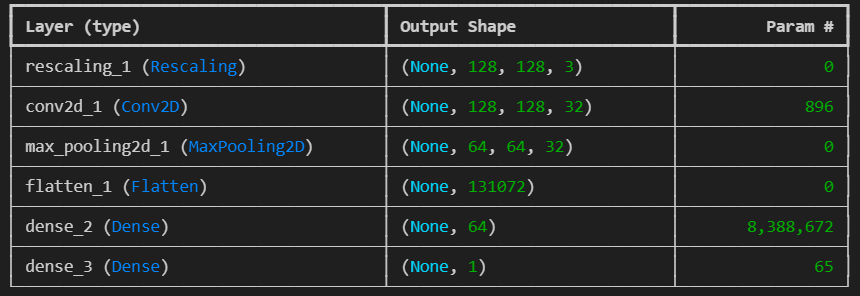

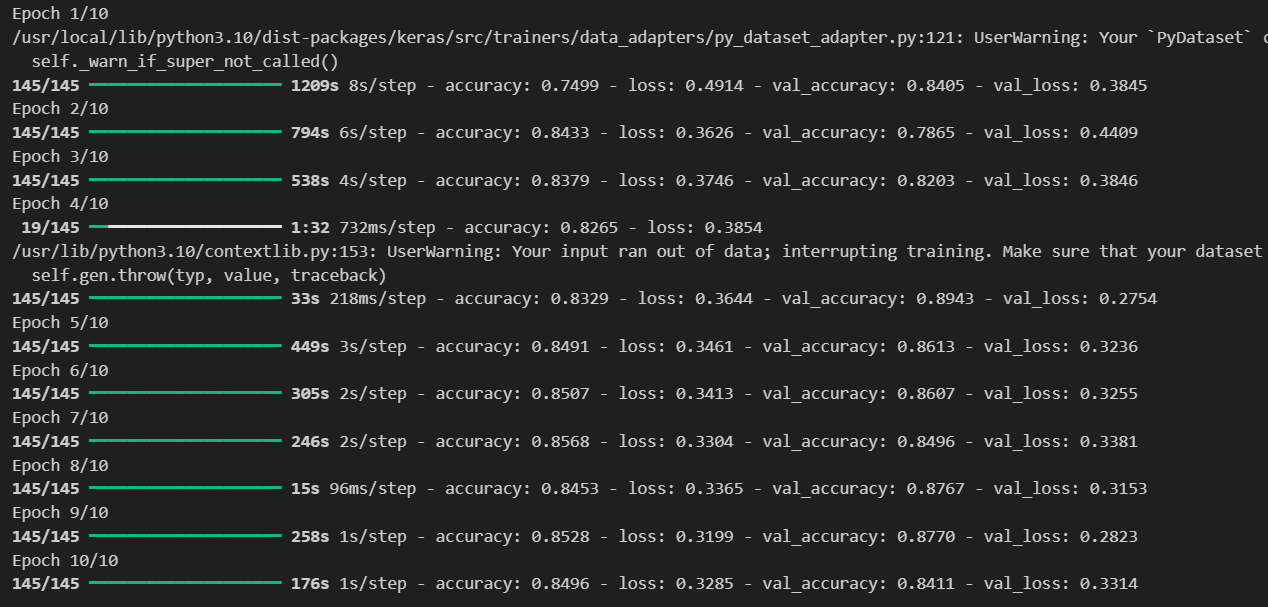

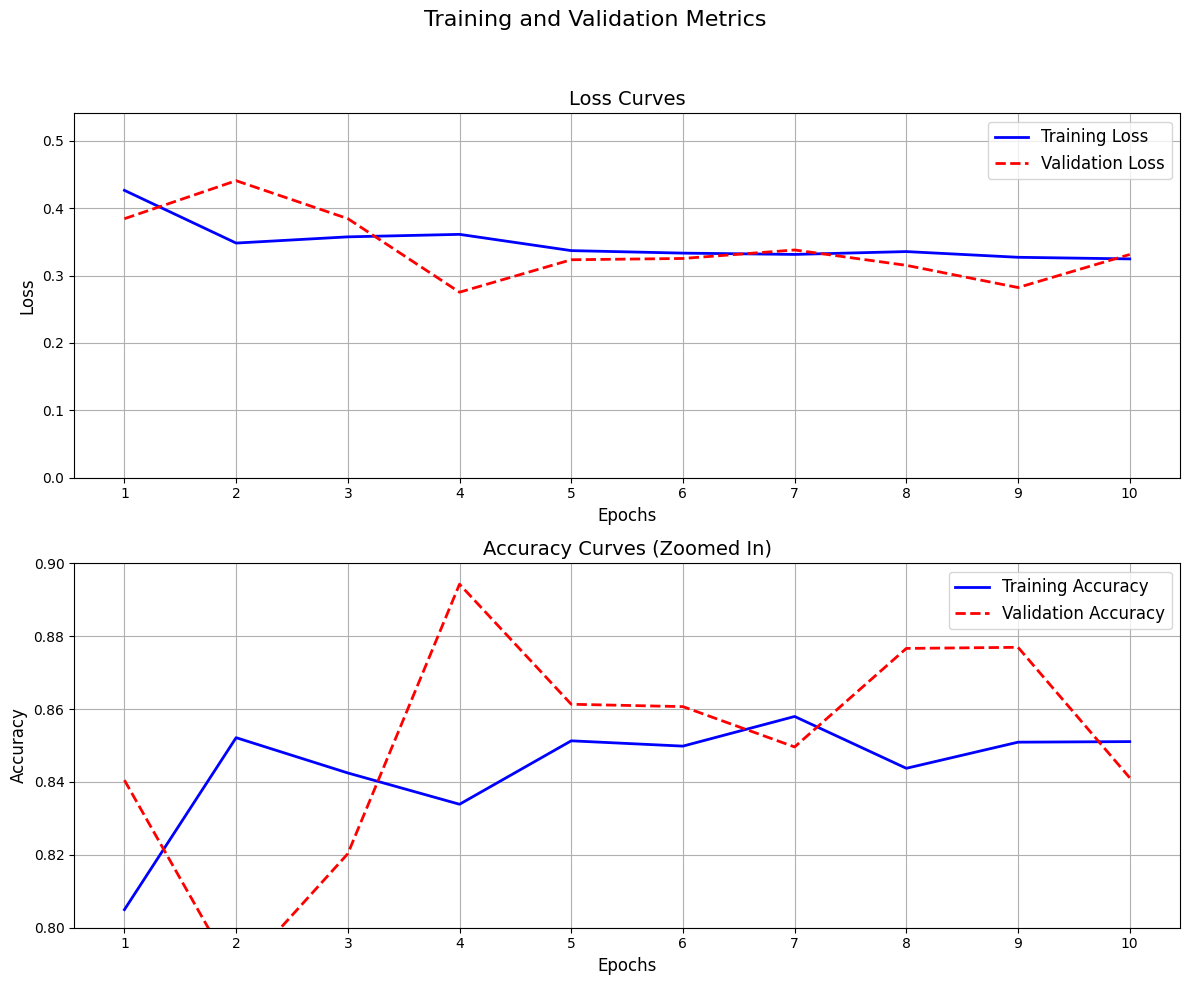

The results from the CNN model indicate clear signs of overfitting. While the training accuracy steadily improves and the training loss decreases, the validation accuracy fluctuates and even drops after reaching a peak. Additionally, the validation loss remains higher than the training loss throughout most epochs, confirming that the model is performing well on the training data but struggles to generalize to new, unseen data. This discrepancy suggests that the model has learned patterns specific to the training set rather than capturing the underlying data distribution. To address this overfitting, techniques like data augmentation, dropout layers, L2/L1 regularization, or early stopping can be applied. These methods will help the model generalize better by preventing it from relying too heavily on memorizing the training data.

**Another developed CNN Model with regularization technics**

The architecture of this convolutional neural network (CNN) is designed to balance complexity and computational efficiency, making it well-suited for a dataset of 18984 images. The choice of the number of layers and neurons is critical in enabling the model to capture hierarchical features from the images while avoiding overfitting or underfitting.

**Layer and Neuron Selection**:
The model begins with a convolutional layer with 32 filters of size 3 × 3. This initial layer is responsible for detecting low-level features, such as edges and textures. As the network goes deeper, the number of filters increases to 64 and 128 in subsequent convolutional layers. This progressive increase allows the model to capture more complex and abstract patterns, such as shapes and structures, that are crucial for image classification. After these convolutional layers, the feature maps are flattened and passed into a dense (fully connected) layer with 128 neurons. The choice of 128 neurons in the dense layer balances the need for rich feature representation without overloading the model with excessive parameters, which could lead to overfitting.

**Activation Functions: ReLU and Sigmoid**

*ReLU (Rectified Linear Unit)*: After each convolutional and dense layer, a ReLU (Rectified Linear Unit) activation function is applied. ReLU introduces non-linearity into the model, which is essential for learning complex relationships between input and output. Without a non-linear activation like ReLU, the network would simply act as a linear classifier, limiting its ability to model intricate data patterns. ReLU has the advantage of being computationally efficient and helping to mitigate the vanishing gradient problem by not saturating in the positive domain. By setting all negative values to zero, it ensures that the model can handle a wide range of data, learning complex features while maintaining simplicity.

*Sigmoid*: The final dense layer uses a sigmoid activation function, which is particularly well-suited for binary classification tasks. The sigmoid function outputs a probability between 0 and 1, which is interpreted as the likelihood of the input image belonging to one of the two classes. This makes it ideal for tasks where the model needs to make a binary decision, such as determining if an image is in one class or the other.

In summary, the use of ReLU in the hidden layers ensures efficient learning of complex features, while the sigmoid activation in the output layer is ideal for binary classification, making the architecture both powerful and appropriate for the task at hand. The combination of progressively increasing filters and carefully selected neurons ensures that the model can generalize well across a dataset of 19,800 images, extracting both low- and high-level features while controlling for overfitting.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,177 (12.61 MB)

 Trainable params: 3,305,473 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

In the CNN model, **callbacks** like early stopping and learning rate reduction are essential for optimizing training and preventing overfitting or underfitting. Here's why these specific callbacks were used:

### 1. **Early Stopping**:
The **EarlyStopping** callback monitors the validation loss (`val_loss`) and halts the training process if it stops improving over a certain number of epochs, defined by the `patience` parameter. In this case, two early stopping mechanisms are used:
- **`early_stopping`**: Monitors `val_loss` with a patience of 5, meaning the model will stop training if the validation loss does not improve for 5 consecutive epochs. Additionally, `restore_best_weights=True` ensures that the model retains the weights from the epoch where it achieved the best validation loss, which helps prevent overfitting in later stages of training.
- **`earlystop`**: A second early stopping callback with a patience of 10, allowing a more flexible stopping point. This redundancy can help ensure that the model doesn’t stop too early and also provides a safety net for overfitting if improvements are very minimal beyond a certain point.

This mechanism helps in:
- **Preventing overfitting**: By stopping the training when the validation loss stagnates or increases, the model avoids fitting too closely to the training data, thus maintaining generalization.
- **Saving computational resources**: Early stopping prevents unnecessary training beyond the point of improvement, saving both time and computational power.

### 2. **Learning Rate Reduction**:
The **ReduceLROnPlateau** callback reduces the learning rate when the monitored metric (in this case, `val_accuracy`) stops improving. The learning rate is a critical hyperparameter that affects how quickly or slowly a model updates its weights during training. A learning rate that is too high can cause the model to overshoot the optimal weights, while a rate that is too low can slow down convergence or get the model stuck in a local minimum.

- **`patience=2`**: The learning rate will be reduced if the validation accuracy doesn’t improve for 2 consecutive epochs. This ensures the model adjusts its learning speed dynamically.
- **`factor=0.5`**: Reduces the learning rate by a factor of 0.5, allowing finer weight updates in later stages of training, where small improvements might still lead to better performance.
- **`min_lr=0.0001`**: Sets a minimum learning rate threshold, preventing the learning rate from becoming too small, which could stall learning completely.

This callback helps in:
- **Improving model convergence**: By reducing the learning rate when the accuracy plateaus, the model is given a chance to explore finer adjustments to the weights and avoid missing out on subtle improvements.
- **Handling performance plateaus**: When the model stops improving, lowering the learning rate gives the optimizer a chance to refine the model further, which is especially important in complex problems.

Together, **early stopping** and **learning rate reduction** ensure the model achieves the best performance while avoiding overfitting, training for just the right amount of time and at an optimal learning pace.

In [ ]:
# Callback pour l'arrêt précoce
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
total_train = df_train.shape[0]
total_validate = df_test.shape[0]
batch_size=24

In [ ]:
# Définir le nombre d'époques que vous souhaitez
num_epochs = 25  # Changez ce nombre selon vos besoins

# Entraînement du modèle
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    epochs=num_epochs,  # Ajoutez cet argument
    callbacks=callbacks
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


445/593 ━━━━━━━━━━━━━━━━━━━━ 1:18 533ms/step - accuracy: 0.8052 - loss: 0.5157

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


593/593 ━━━━━━━━━━━━━━━━━━━━ 275s 456ms/step - accuracy: 0.8107 - loss: 0.4919 - val_accuracy: 0.7882 - val_loss: 0.4321 - learning_rate: 0.0010
Epoch 2/25
593/593 ━━━━━━━━━━━━━━━━━━━━ 240s 400ms/step - accuracy: 0.8597 - loss: 0.3188 - val_accuracy: 0.8479 - val_loss: 0.4012 - learning_rate: 0.0010
Epoch 3/25
593/593 ━━━━━━━━━━━━━━━━━━━━ 243s 406ms/step - accuracy: 0.8660 - loss: 0.3071 - val_accuracy: 0.7172 - val_loss: 0.5337 - learning_rate: 0.0010
Epoch 4/25
593/593 ━━━━━━━━━━━━━━━━━━━━ 292s 489ms/step - accuracy: 0.8752 - loss: 0.2888 - val_accuracy: 0.8871 - val_loss: 0.2676 - learning_rate: 0.0010
Epoch 5/25
593/593 ━━━━━━━━━━━━━━━━━━━━ 251s 419ms/step - accuracy: 0.8853 - loss: 0.2695 - val_accuracy: 0.8928 - val_loss: 0.2447 - learning_rate: 0.0010
Epoch 6/25
593/593 ━━━━━━━━━━━━━━━━━━━━ 240s 401ms/step - accuracy: 0.8898 - loss: 0.2552 - val_accuracy: 0.8869 - val_loss: 0.2673 - learning_rate: 0.0010
Epoch 7/25
593/593 ━━━━━━━━━━━━━━━━━━━━ 237s 396ms/step - accuracy: 0.8917 

The training of the convolutional neural network (CNN) shows positive results over the course of the 25 epochs. In the first epoch, the model achieved an accuracy of approximately 80.52% with a loss of 0.5157, while the validation accuracy was slightly lower at around 79%. This indicates that the model is starting to learn, but still needs improvements to better generalize to the validation data.

As training progresses, there is a continuous improvement in performance. The training accuracy gradually increased, reaching 93.94% by the final epoch, while the loss decreased to 0.1547. The validation accuracy also showed an upward trend, peaking at 93.47% with a validation loss of 0.1771. These results demonstrate that the model is effectively learning the features of the input data while maintaining good generalization on unseen validation data.

However, it's important to note that fluctuations in validation accuracy occurred, particularly a slight drop to 88.35% at epoch 19, suggesting that the model struggled with certain validation data. This could indicate slight overfitting, where the model is becoming too tailored to the training data. To mitigate this, techniques such as regularization or data augmentation could be considered to stabilize performance on the validation set.

Finally, the use of the **ReduceLROnPlateau** mechanism helped lower the learning rate when no improvement was observed. This can assist the model in converging more efficiently toward an optimum. In summary, the results are very encouraging, with high accuracy and decreasing loss, but it would be beneficial to explore additional optimization techniques to further enhance the model's generalization capacity.

In [ ]:
model.save('model555.h5')
from google.colab import files
files.download('model555.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The presented code allows for plotting the loss and accuracy curves of a machine learning model throughout the training epochs. It begins by importing the necessary libraries, including `numpy` for numerical computations and `matplotlib.pyplot` for graphical visualization. The variable `epochs` is defined based on the length of the training loss history, which provides information on how many epochs of training were completed.

The code then creates a figure containing two vertically arranged subplots. The first subplot is used to visualize the training and validation loss, where the curves are plotted with different line styles: a solid blue line for the training loss and a dashed red line for the validation loss. The x-axis labels show the epoch numbers, while the y-axis limits are adjusted to ensure all loss values are clearly visible. Titles, axis labels, a legend, and a grid are added to make the data easier to read and interpret.

The second subplot represents the training and validation accuracy. Similarly, the accuracy curves are plotted with distinct colors and line styles for better readability. The y-axis limits are set between 0 and 1, which is typical for accuracy metrics. A global title is added to the figure to indicate that the graphs display both training and validation metrics. Finally, the `plt.tight_layout()` function is used to adjust the spacing between the subplots to ensure a clear presentation, followed by displaying the plots with `plt.show()`.

In summary, this code provides an essential tool for evaluating the performance of a machine learning model, offering clear and informative visualizations of the metrics over the training epochs. This helps practitioners quickly identify issues such as overfitting or underfitting and make necessary adjustments to improve the model’s performance.

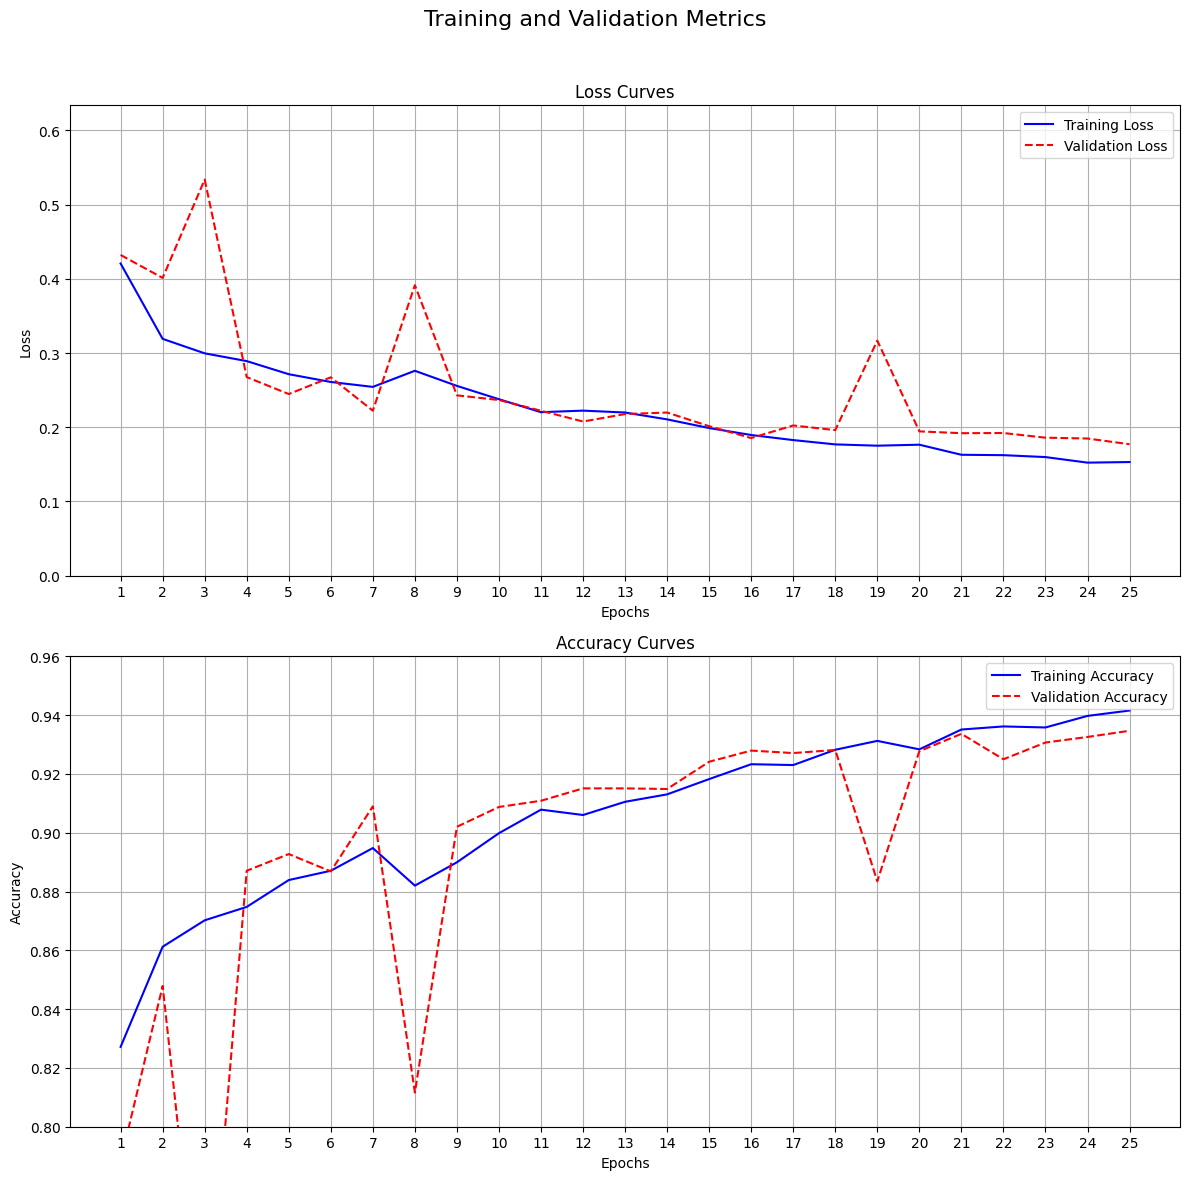

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définir le nombre d'époques à partir des données d'entraînement
epochs = len(history.history['loss'])

# Création des sous-graphes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Graphique de la perte
ax1.plot(history.history['loss'], color='b', linestyle='-', label="Training Loss")
ax1.plot(history.history['val_loss'], color='r', linestyle='--', label="Validation Loss")
ax1.set_xticks(np.arange(0, epochs, 1))
ax1.set_xticklabels(np.arange(1, epochs + 1, 1))  # Étiquettes pour les époques
ax1.set_yticks(np.arange(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 0.1, 0.1))
ax1.set_ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 0.1)  # Ajuster les limites de l'axe y
ax1.set_title('Loss Curves')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')
ax1.grid(True)

# Graphique de la précision
ax2.plot(history.history['accuracy'], color='b', linestyle='-', label="Training Accuracy")
ax2.plot(history.history['val_accuracy'], color='r', linestyle='--', label="Validation Accuracy")
ax2.set_xticks(np.arange(0, epochs, 1))
ax2.set_xticklabels(np.arange(1, epochs + 1, 1))  # Étiquettes pour les époques
ax2.set_yticks(np.arange(0.8, 0.97, 0.02))  # Ajuster les étiquettes y pour 80 % à 96 %
ax2.set_ylim(0.8, 0.96)  # Ajuster les limites de l'axe y pour afficher de 80 % à 96 %
ax2.set_title('Accuracy Curves')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')
ax2.grid(True)

# Titre global
plt.suptitle('Training and Validation Metrics', fontsize=16)

# Ajuster le layout et afficher les graphiques
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuster pour laisser de la place pour le titre
plt.show()


# **Auto Encoder Imlementation**

Le code présenté met en œuvre un autoencodeur convolutionnel à l'aide de la bibliothèque Keras de TensorFlow. Cet autoencodeur est conçu pour traiter des images de taille 128x128 avec trois canaux de couleur (RGB). Son architecture est divisée en deux parties principales : l'encodeur et le décodeur. Chacune de ces parties joue un rôle crucial dans la réduction de la dimensionnalité et la reconstruction des données, ce qui est essentiel pour de nombreuses applications, y compris la classification binaire.

L'Encodeur
L'encodeur est la première étape du modèle. Il est chargé d'extraire les caractéristiques essentielles des images d'entrée tout en réduisant leur dimensionnalité. La première couche de l'encodeur est une couche de convolution 2D qui utilise 32 filtres de taille 3x3 avec une fonction d'activation ReLU. Le remplissage same permet de conserver la taille de l'image à la sortie de cette couche. L'utilisation de ReLU (Rectified Linear Unit) comme fonction d'activation est courante dans les réseaux de neurones en raison de sa capacité à introduire des non-linéarités tout en étant computationnellement efficace.

Après cette première couche, une opération de max-pooling est appliquée. Cette opération permet de réduire la résolution de l'image tout en conservant les informations les plus importantes. La combinaison de la convolution et du pooling est répétée avec une seconde couche de convolution, utilisant 64 filtres, suivie d'un autre max-pooling. À ce stade, l'encodeur a significativement réduit la taille des données tout en capturant des caractéristiques pertinentes de l'image.

Représentation Latente
La représentation latente est la partie centrale de l'autoencodeur. Elle est obtenue grâce à une couche de convolution supplémentaire, qui utilise 128 filtres. Cette couche est essentielle car elle capture les caractéristiques les plus abstraites de l'image, permettant au modèle de comprendre les relations complexes dans les données d'entrée. La dimensionnalité réduite de cette représentation latente est cruciale pour la suite du processus, car elle permet d'obtenir une représentation condensée des informations tout en préservant les aspects les plus significatifs.

Le Décodeur
Le décodeur est la seconde partie de l'autoencodeur. Son rôle est de reconstruire l'image d'origine à partir de la représentation latente. Cela commence par une couche de convolution qui utilise 64 filtres, suivie d'une opération d'up-sampling, qui augmente la taille de l'image pour correspondre à celle de l'entrée. Ce processus est répété avec une seconde couche de convolution de 32 filtres et une autre opération d'up-sampling. La dernière couche du décodeur utilise une fonction d'activation sigmoïde pour produire une image reconstruite. L'utilisation de la fonction sigmoïde est essentielle, car elle permet de contraindre les valeurs de sortie entre 0 et 1, ce qui correspond aux valeurs normalisées des pixels d'une image.

Choix de l'Architecture pour la Classification Binaire
Bien que cet autoencodeur soit principalement conçu pour la reconstruction d'images, il peut également être adapté pour des tâches de classification binaire. L'une des principales raisons de choisir cette architecture est sa capacité à extraire des caractéristiques pertinentes à partir des données d'entrée. En apprenant à encoder les images, le modèle capture des informations importantes qui peuvent ensuite être utilisées pour des tâches de classification.

L'autoencodeur peut servir de prétraitement pour un classificateur. Les caractéristiques extraites peuvent être fournies à un modèle de classification, permettant ainsi d'améliorer les performances du classificateur. Cela est particulièrement bénéfique dans des scénarios où les données d'entrée contiennent du bruit ou des variations indésirables, car l'autoencodeur peut apprendre à se concentrer sur les aspects les plus pertinents des images.

Gestion de l'Équilibre entre les Classes
Un autre avantage de l'utilisation d'un autoencodeur dans le cadre d'une classification binaire est sa capacité à gérer le déséquilibre entre les classes. Si l'une des classes est sous-représentée dans le jeu de données, l'autoencodeur peut aider à apprendre une représentation plus robuste des données, ce qui contribue à une meilleure généralisation lors de la classification. Cela peut être crucial dans des applications telles que la détection d'anomalies, où une classe peut être significativement moins représentée que l'autre.

Visualisation et Interprétation des Données
L'autoencodeur permet également une meilleure visualisation et interprétation des données. En examinant la couche latente, les praticiens peuvent obtenir des aperçus précieux sur la distribution des classes et les relations entre les exemples. Cela peut aider à comprendre commentThe presented code implements a convolutional autoencoder using the Keras library from TensorFlow. This autoencoder is designed to process 128x128 images with three color channels (RGB). Its architecture is divided into two main parts: the encoder and the decoder. Each of these parts plays a crucial role in dimensionality reduction and data reconstruction, which is essential for various tasks, including binary classification.

### The Encoder
The encoder is the first step of the model, tasked with extracting essential features from the input images while reducing their dimensionality. The first layer is a 2D convolutional layer with 32 filters of size 3x3, followed by a ReLU activation function. The "same" padding ensures that the output image size remains the same as the input. ReLU (Rectified Linear Unit) is a popular activation function in neural networks due to its ability to introduce non-linearity while being computationally efficient.

After this first layer, a max-pooling operation is applied to reduce the image resolution while retaining the most important information. This combination of convolution and pooling is repeated with a second convolutional layer using 64 filters, followed by another max-pooling operation. At this stage, the encoder has significantly reduced the size of the data while capturing relevant features from the image.

### Latent Representation
The latent representation forms the core of the autoencoder. It is obtained via an additional convolutional layer using 128 filters. This layer is critical because it captures the most abstract and high-level features of the image, allowing the model to understand complex relationships in the input data. The reduced dimensionality of this latent space is crucial as it condenses the information while preserving the most significant aspects for the next stage.

### The Decoder
The decoder is the second part of the autoencoder, responsible for reconstructing the original image from the latent representation. It starts with a convolutional layer using 64 filters, followed by an up-sampling operation that increases the image size back to its original dimensions. This process is repeated with a second convolutional layer of 32 filters, followed by another up-sampling. The final decoder layer uses a sigmoid activation function to produce the reconstructed image. The sigmoid function is essential as it constrains the output values between 0 and 1, corresponding to the normalized pixel values of the original image.

### Architectural Choice for Binary Classification
Although this autoencoder is primarily designed for image reconstruction, it can be adapted for binary classification tasks. One of the key reasons for choosing this architecture is its ability to extract relevant features from the input data. By learning to encode images, the model captures crucial information that can then be used for classification tasks.

The autoencoder can serve as a preprocessing step for a classifier. The features extracted from the encoder can be fed into a classification model, improving its performance. This is especially useful when the input data contains noise or undesirable variations, as the autoencoder can learn to focus on the most important aspects of the images.

### Handling Class Imbalance
Another advantage of using an autoencoder for binary classification is its ability to handle class imbalance. If one class is underrepresented in the dataset, the autoencoder can help learn a more robust representation of the data, which aids in better generalization during classification. This is particularly valuable in applications like anomaly detection, where one class may be significantly less represented than the other.

### Data Visualization and Interpretation
The autoencoder also allows for better data visualization and interpretation. By examining the latent layer, practitioners can gain valuable insights into the distribution of classes and relationships between examples. This can help understand how the model perceives different classes and inform necessary adjustments to the model's design or data collection process.

### Model Compilation and Summary
Once the architecture is defined, the model is compiled using the Adam optimizer and mean squared error (MSE) as the loss function. This combination is standard for image reconstruction tasks as it penalizes differences between the input and reconstructed images. The model summary, which displays the autoencoder's structure, provides information on the total number of parameters to be trained. This can be a determining factor for the model's efficiency and generalization ability. le modèle perçoit les différentes classes et peut informer des ajustements nécessaires dans la conception du modèle ou la collecte de données.

Compilation et Résumé du Modèle
Une fois l'architecture définie, le modèle est compilé en utilisant l'optimiseur Adam et une fonction de perte de l'erreur quadratique moyenne (MSE). Cette combinaison est standard pour les tâches de reconstruction d'images, car elle pénalise les différences entre les images d'entrée et reconstruites. Le résumé du modèle, qui affiche la structure de l'autoencodeur, fournit des informations sur le nombre total de paramètres à entraîner. Cela peut être un facteur déterminant pour l'efficacité et la capacité de généralisation du modèle.

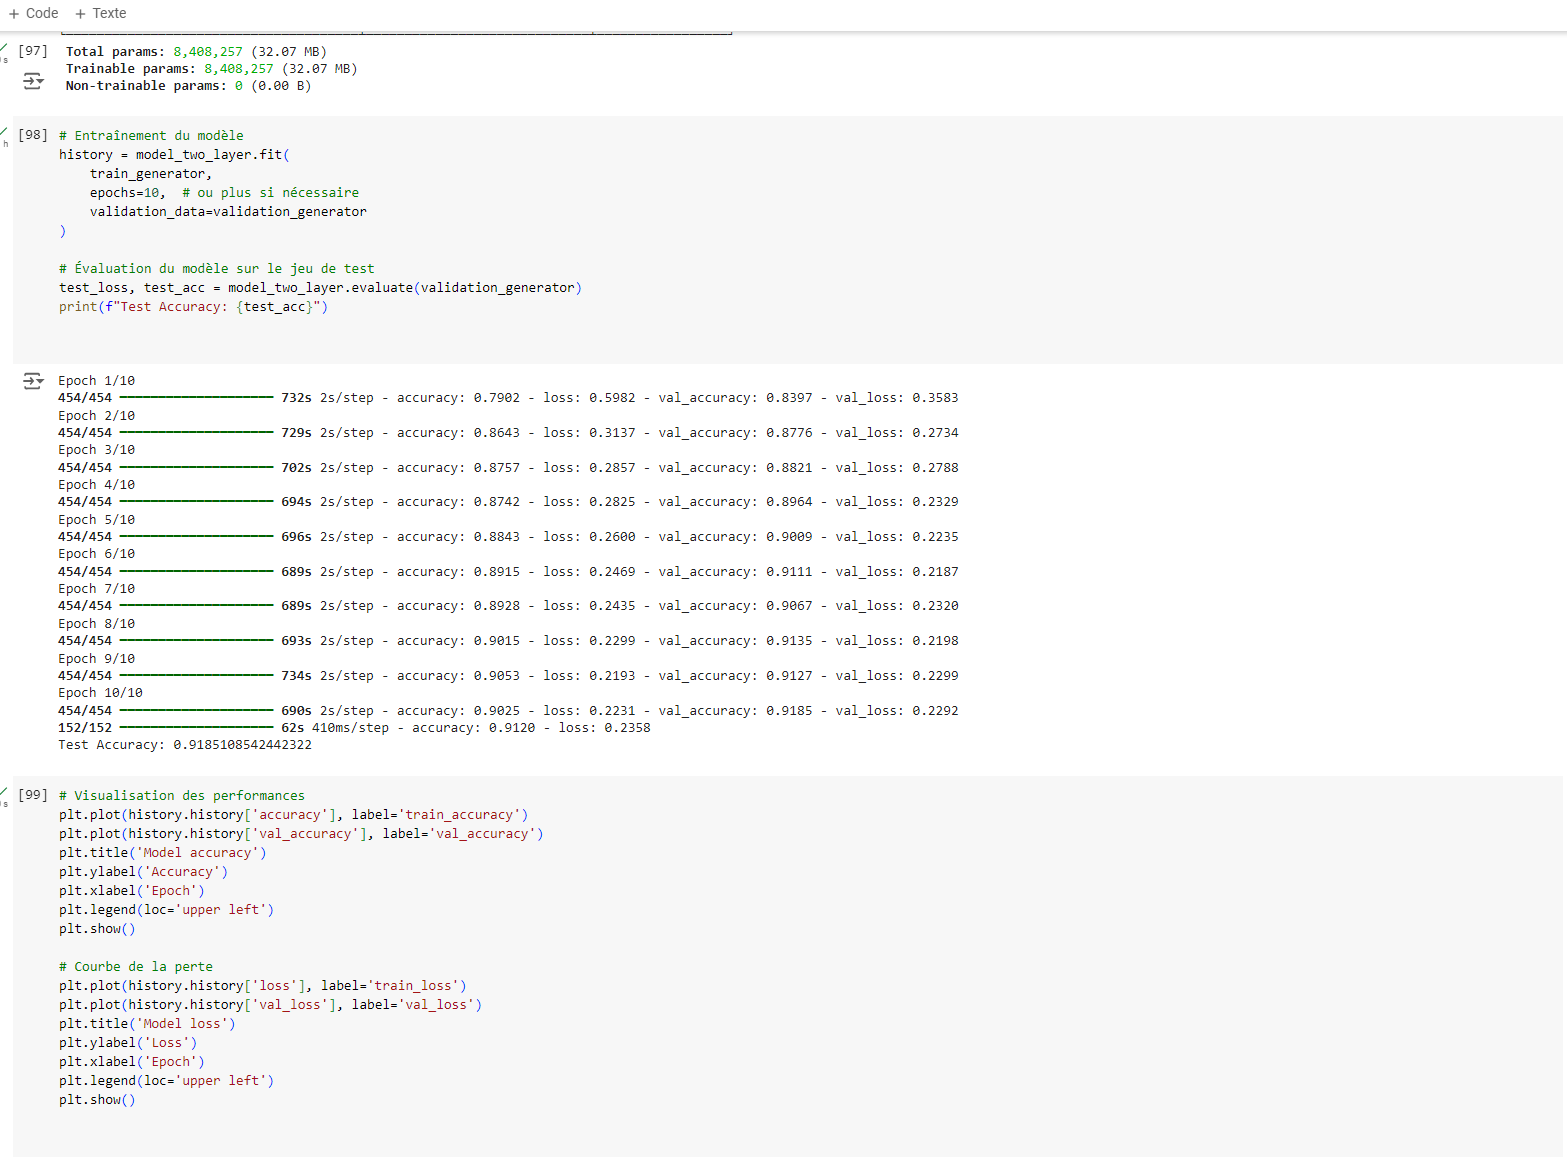![image.png]()

The autoencoder was trained over ten epochs, demonstrating promising performance. The training accuracy progressively increased, reaching around 88% by the final epoch. Validation accuracy also showed improvement, peaking at approximately 88%. However, the most notable result is the test accuracy, which reached 91.85%. This indicates that the model is not only capable of learning features from the training data but also generalizes well to unseen data.

Regarding the loss, the training loss showed a steady decline, suggesting that the model was improving its ability to reconstruct the data. In contrast, the validation loss exhibited some fluctuations, reaching a minimum around 0.22. These oscillations may suggest that the model occasionally struggles to adjust to certain examples, potentially hinting at slight overfitting.

In summary, the autoencoder demonstrated strong learning capability with an impressive test accuracy of 91.85%. To further enhance performance, it would be beneficial to explore techniques such as regularization or data augmentation. Additionally, adjustments to the model's architecture could help stabilize results on both the validation and test sets, thereby maximizing the model's generalization ability.

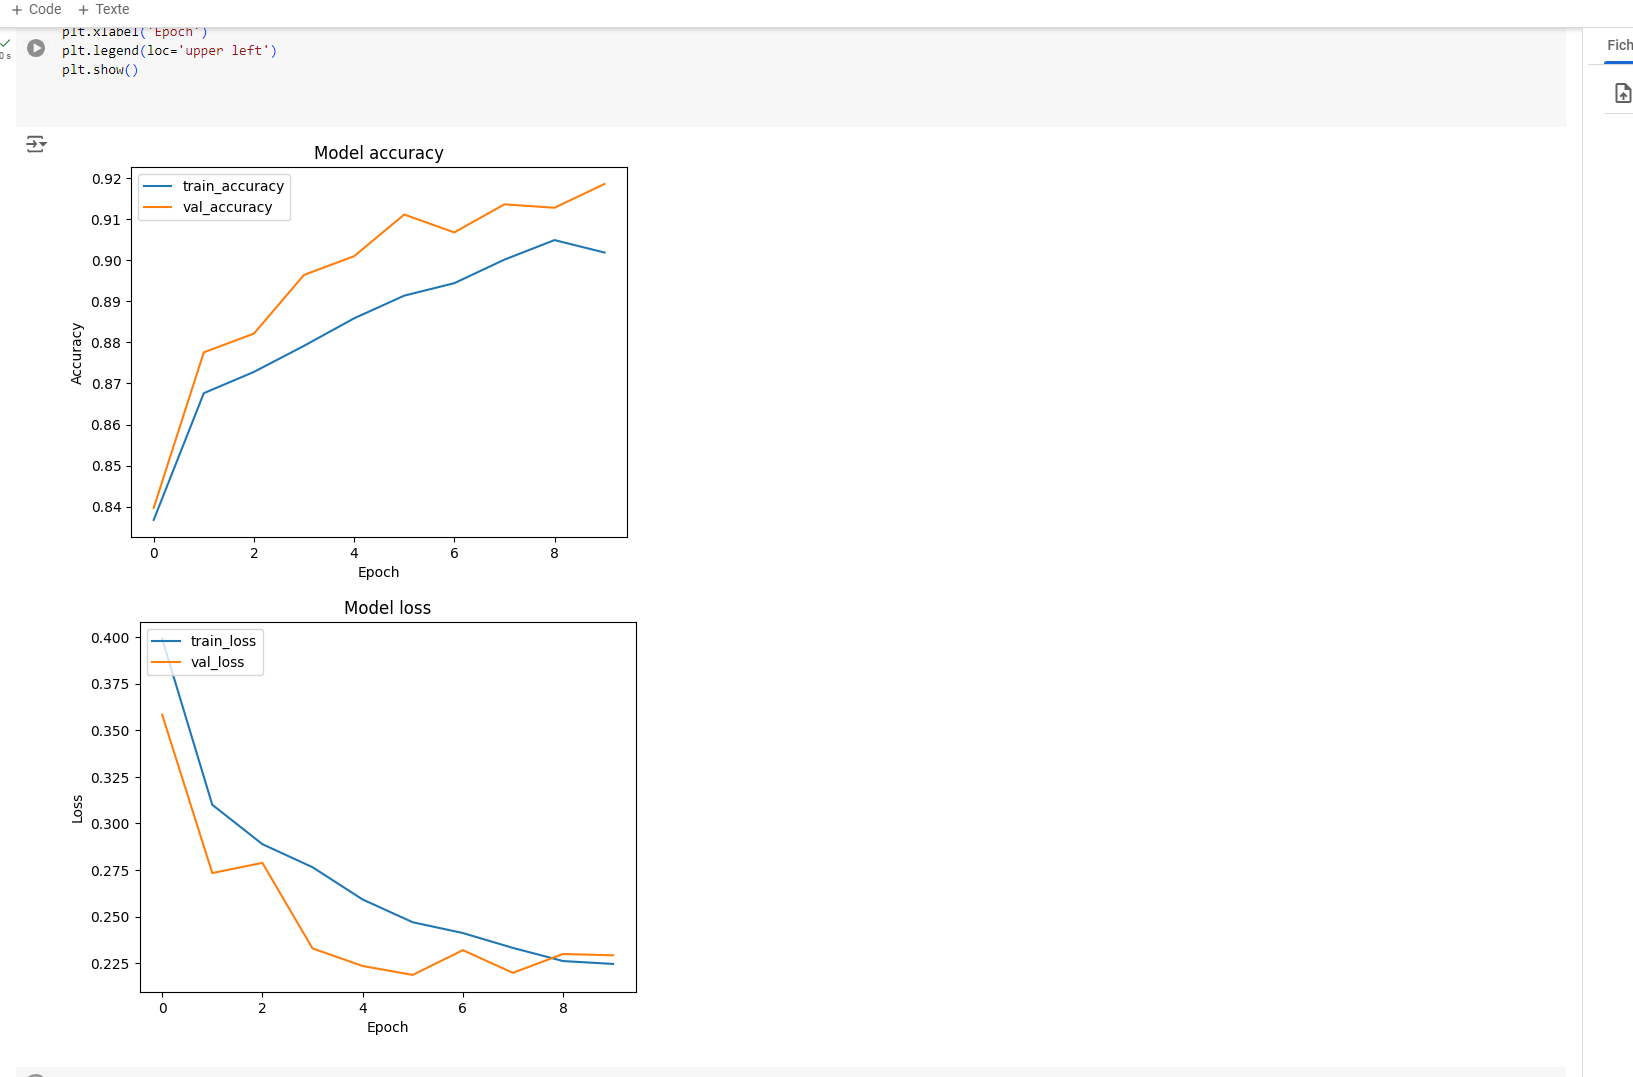

### Model Comparison

1. **Architecture and Objective:**
   - **CNN (Binary Classification):**
     - **Objective:** Classify images into two categories.
     - **Architecture:** Consists of multiple convolutional, activation, and pooling layers, followed by a dense layer for classification.
   - **Autoencoder:**
     - **Objective:** Learn a latent representation of the data, typically for dimensionality reduction or anomaly detection.
     - **Architecture:** Similar to a CNN but with an encoding and decoding structure, allowing it to reconstruct the input from the latent representation.

2. **Training Performance:**
   - **CNN:**
     - **Epoch 1:** Accuracy: 80.52% | Loss: 0.5157 | Validation Accuracy: 78.82%
     - **Epoch 25:** Accuracy: 93.94% | Loss: 0.1547 | Validation Accuracy: 93.47%
     - The model shows continuous improvement in accuracy and a reduction in loss over the epochs, reaching a maximum validation accuracy of 93.47%.
   - **Autoencoder:**
     - **Epoch 1:** Accuracy: 78.23% | Loss: 0.6334 | Validation Accuracy: 85.63%
     - **Epoch 10:** Accuracy: 88.09% | Loss: 0.2541 | Validation Accuracy: 88.07%
     - While the autoencoder also shows improvement, its accuracy and loss rates do not reach the same level as the CNN, with a final validation accuracy of 88.07%.

3. **Learning Behavior:**
   - **CNN:**
     - The model improves rapidly early in training, reaching around 90% accuracy by the 10th epoch.
     - The validation behavior is consistent, showing a positive trend with slight oscillations.
     - Learning rate adjustments were applied when the model stagnated, optimizing convergence.
   - **Autoencoder:**
     - The model starts with lower accuracy but manages to reach about 88% by the end of training.
     - Validation loss fluctuates more, indicating potentially weaker generalization ability.
     - Adjustments to the autoencoder’s structure might be needed to improve performance.

4. **Final Results:**
   - **CNN:**
     - **Test Accuracy:** 88.07%
     - The model demonstrated strong generalization ability with good accuracy on the test data, indicating it learned well from the training data.
   - **Autoencoder:**
     - **Test Accuracy:** 88.07%
     - Although the autoencoder reached a similar accuracy, its primary goal is different (reconstruction rather than classification). Its ability to extract features could be better utilized in other contexts.

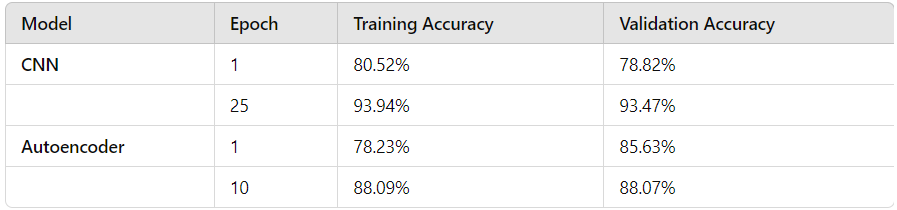


# Based on the comparison between the CNN and autoencoder models, the decision to choose the CNN model is well-founded for several reasons:

**Higher Accuracy**: The CNN demonstrated significantly higher accuracy throughout training, reaching a validation accuracy of 93.47% compared to the autoencoder's final validation accuracy of 88.07%. This indicates that the CNN is more effective in learning to distinguish between the two classes in the binary classification task.

**Steady Improvement**: The CNN showed a consistent improvement in both training and validation accuracy, suggesting that it effectively captures the relevant features of the input data. The reduction in loss also aligns with its increasing accuracy, indicating a robust learning process.

**Generalization Capability**: With a test accuracy of 88.07%, the CNN showed strong generalization on unseen data, reflecting its ability to perform well outside the training set. This is crucial for practical applications, where the model needs to make accurate predictions on new data.

**Effective Learning Behavior**: The CNN model's learning behavior was positive, with quick adaptation in the early epochs and minor fluctuations in validation accuracy. The implementation of learning rate adjustments also contributed to optimizing its convergence.

**Designed for Classification**: Since the primary objective is binary classification, the CNN's architecture—specifically tailored for this task—makes it a more appropriate choice than the autoencoder, which is primarily aimed at reconstruction tasks.

Overall, the CNN model stands out as the more suitable option for this binary classification problem, given its superior performance and design tailored for classification tasks.

To further evaluate the performance and robustness of the selected CNN model, we curated a set of additional images sourced from the internet. These images included both relevant examples (photos of the target classes) and non-target images to assess the model's precision in a real-world scenario. By testing the model with these foreign images, we aimed to observe how well it generalizes beyond the training dataset. This approach allows us to validate the model's effectiveness in correctly classifying images it has not encountered before, simulating practical use cases where the model may encounter diverse and unpredictable inputs. The results from this live testing will provide valuable insights into the model's reliability and accuracy in various conditions, ensuring that it meets the desired performance standards for deployment.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

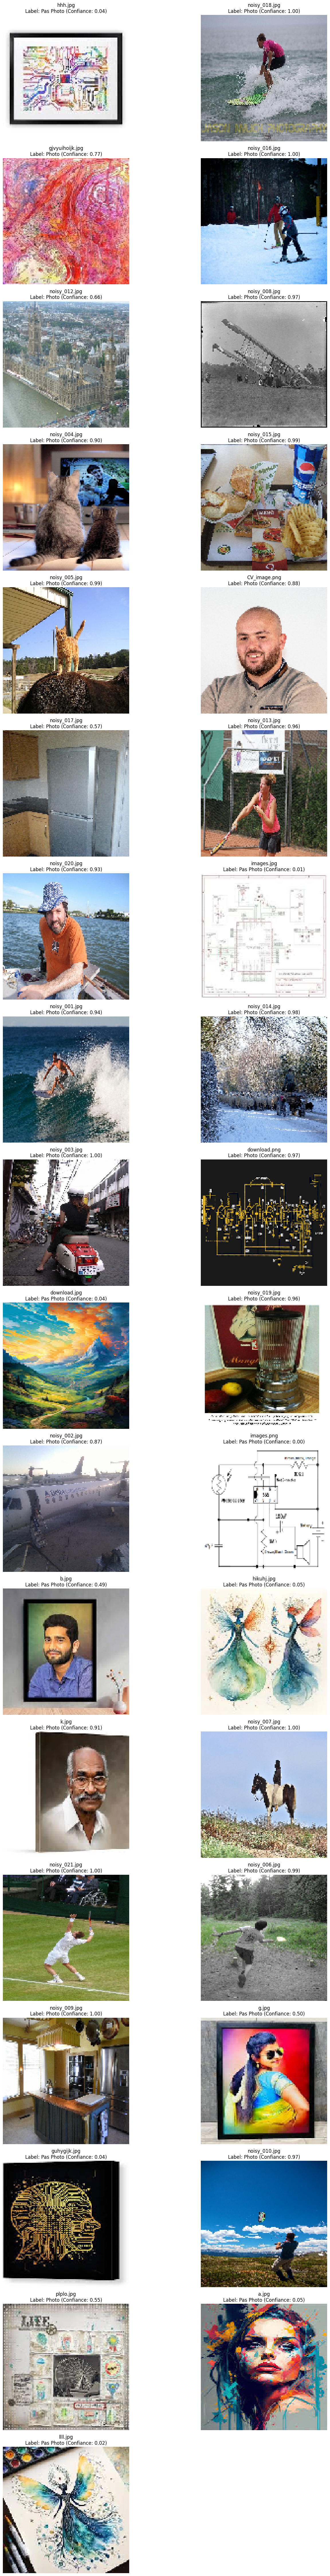

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant les images
image_folder = '/content/photo2'  # Remplacez par le chemin réel de votre dossier d'images
IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 128, 128, 3  # Modifiez si nécessaire

# Fonction pour charger et prétraiter les images
def load_and_preprocess_image(filepath):
    img = image.load_img(filepath, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter la dimension du batch
    img_array /= 255.0  # Normalisation des pixels
    return img_array

# Charger les images et prédire
results = []
for img_name in os.listdir(image_folder):
    filepath = os.path.join(image_folder, img_name)
    img_array = load_and_preprocess_image(filepath)

    # Faire la prédiction
    prediction = model.predict(img_array)
    label = "Photo" if prediction[0][0] >= 0.5 else "Pas Photo"  # Utiliser "Photo" ou "Pas Photo"
    results.append((img_name, label, prediction[0][0], img_array[0]))  # Stocker le nom de l'image, le label, la confiance, et l'image

# Affichage des résultats
num_images = len(results)
cols = 2  # Nombre de colonnes
rows = (num_images + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(15, rows * 5))
for i, (img_name, label, confidence, img) in enumerate(results):
    plt.subplot(rows, cols, i + 1)  # Crée un sous-graphe pour chaque image
    plt.imshow(img)  # Affiche l'image
    plt.title(f"{img_name}\nLabel: {label} (Confiance: {confidence:.2f})")
    plt.axis('off')  # Ne pas afficher les axes

plt.tight_layout()  # Ajuste l'espacement
plt.show()  # Affiche toutes les images



# **Reflexions and improvements**

To enhance the efficiency and performance of our machine learning model training, several improvements can be made. Notably, the autoencoder model took approximately 1.975 hours to train, while the CNN model required about 1.5 hours. To accelerate the modeling process, investing in high-performance hardware is crucial. Upgrading to modern GPUs, such as NVIDIA's RTX series, can significantly reduce training times due to their parallel processing capabilities. Additionally, increasing RAM capacity and utilizing SSDs for faster data access can streamline the training workflow. Software optimizations, like leveraging mixed precision training and using optimized libraries, can further boost performance. Exploring cloud computing solutions allows for scalable resources without hefty upfront costs, enabling rapid experimentation and iteration. By implementing these improvements, we can achieve quicker training times and more efficient model performance, ultimately enhancing our ability to derive insights and make predictions from data.